Anjaneya Bajaj
2022A7PS0164P

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import memory_usage
from memory_profiler import profile
import time

Reading the data using pandas into a dataframe

In [2]:
health = pd.read_csv('smoking_driking_dataset_Ver01.csv')

We use head to get the first 5 entries of the dataframe. The info command gives us some more insights into the data.

The aim of creating this model is to get either Y or N for the DRK_YN attribute i.e. does the given person (one entry in a row) drink. It is a binary classification task.
We also aim to find which category of smokers do the people belong to. This is a multi-class classification task with 3 categories.

We have 991346 entries and 24 attributes - the two target variables are DRK_YN and SMK_stat_type_cd. Non-null count indicates number of values for that feature that are not missing data - all our attributes have the complete data for every row. THis is confirmed by using the isnull function.

We also check how many types of values each attribute has. This is tells that attributes like sex, hearing and smoking history are in fact categorical in nature where each number indicates a category. This is confirmed while directly looking at the dataset as a csv file.

All our data is numeric with either floating point numbers or integers. The 2 object types are that of sex and DRK_YN.

In [3]:
print(health.head())
print(health.tail())
print(health.info())
print(health.isnull().sum())
print(health.nunique())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP

In [4]:
print("No. of duplicates in original dataset = ", health.duplicated().sum())
health.drop_duplicates(inplace=True)
print("No. of duplicates after modification = ", health.duplicated().sum())

No. of duplicates in original dataset =  26
No. of duplicates after modification =  0


These 2 attributes i.e. sex and DRK_YN need to be converted to numerical attributes so that we can easily work with them. We will encode them using the Binary Encoder.
For sex, 1 is male and 2 is female. For DRK_YN, 1 is Y and 0 is N.

In [5]:
health['sex'] = pd.get_dummies(health['sex'], drop_first=True)
health['DRK_YN'] = pd.get_dummies(health['DRK_YN'], drop_first=True)


These are histograms of each attribute. These give us an idea about the distribution and outliers of each attribute. 

There are approximately equal number of men and women with slightly lesser number of women.

We now take a closer look at some of the histograms.

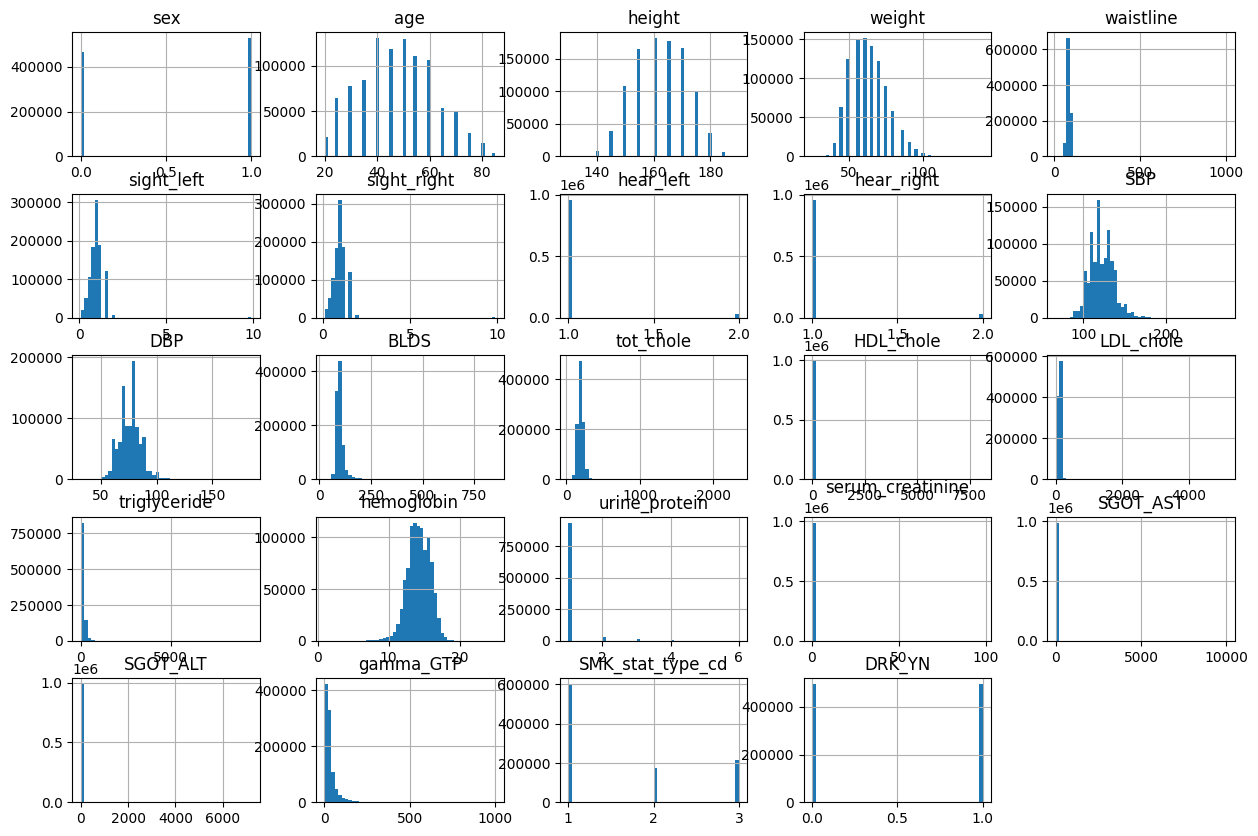

In [6]:
%matplotlib inline
health.hist(bins = 50, figsize = (15,10))
plt.show()

count    991320.000000
mean         47.614529
std          14.181346
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: age, dtype: float64 



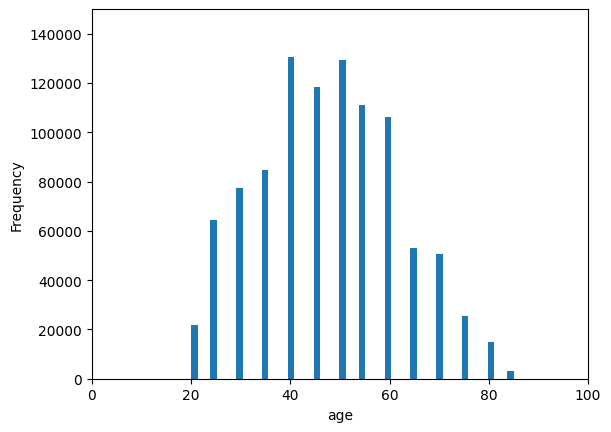

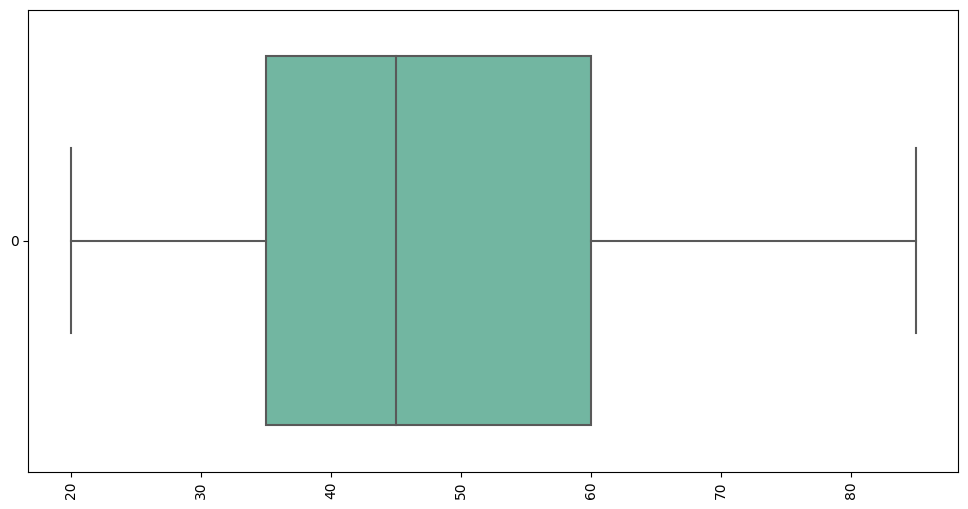

In [7]:
print(health.age.describe(),'\n')
plt.hist(health['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 100)  # Set the x-axis scale (limits)
plt.ylim(0, 150000)       # Set the y-axis scale (limits)

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=health.age, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()


We notice that age is distributed approximtely in a bell curve shape with a mean age of 47.6 and standard deviation of 14 years. The minimum age is 20 and maximum age of 85. Maximum number of people are in the age group of 40-60. The bell curve is not exactly symmetric and is slightly right-tailed. Age has a wide spread of values.
There are almost no outliers in the age attribute.

count    991320.000000
mean        162.240563
std           9.282922
min         130.000000
25%         155.000000
50%         160.000000
75%         170.000000
max         190.000000
Name: height, dtype: float64 



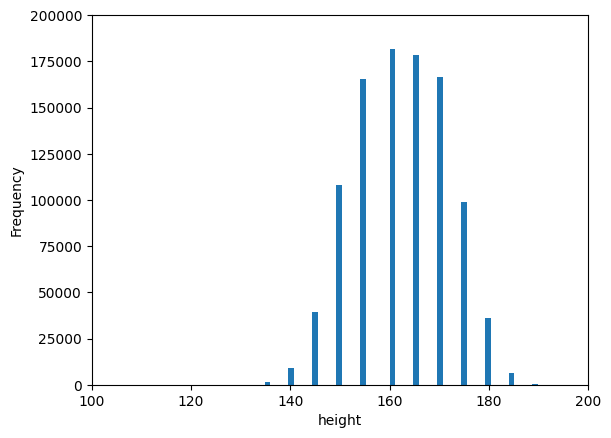

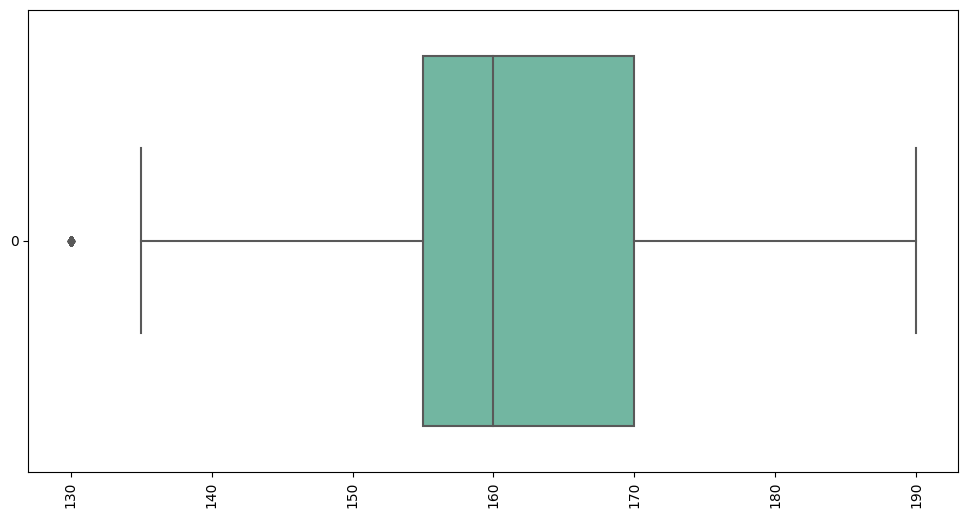

In [8]:
print(health.height.describe(),'\n')
plt.hist(health['height'], bins=50)
plt.xlabel('height')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(100, 200)  # Set the x-axis scale (limits)
plt.ylim(0, 200000)       # Set the y-axis scale (limits)

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=health.height, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()


The distribution of height is also approximately bell shaped with a mean of 162.5 cm and standard deviation of 9.5 cm. The minimum height is 130 cm and maximum height is 190 cm. The maximum number of people are in the height range of 150-170 cm. The bell curve is almost symmetric. Its small standard deviation indicates that most people are of average height. 
Again, there are almost negligible outliers in the height attribute.

count    991320.000000
mean         63.283884
std          12.514101
min          25.000000
25%          55.000000
50%          60.000000
75%          70.000000
max         140.000000
Name: weight, dtype: float64 



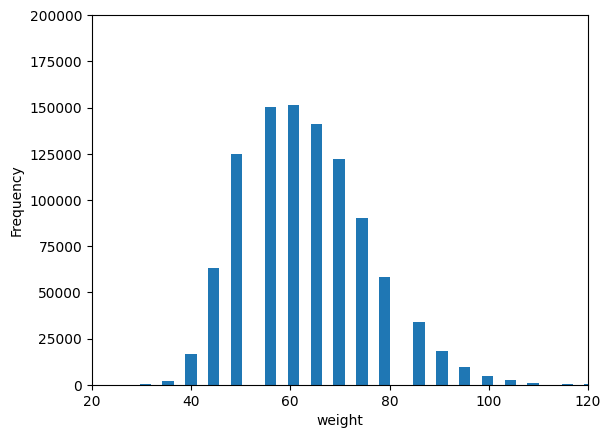

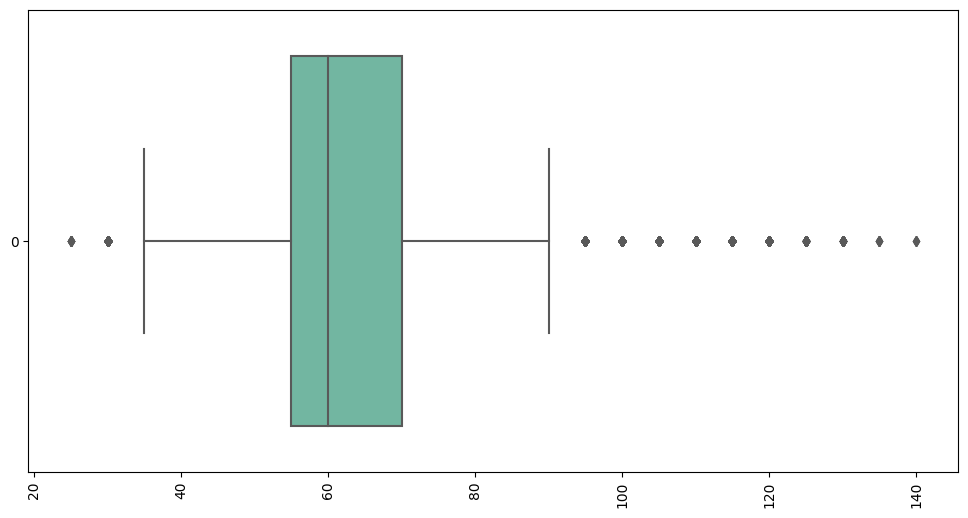

In [9]:
print(health.weight.describe(),'\n')
plt.hist(health['weight'], bins=50)
plt.xlabel('weight')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(20, 120)  # Set the x-axis scale (limits)
plt.ylim(0, 200000)       # Set the y-axis scale (limits)

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=health.weight, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()


The distribution of weight is also approximately bell shaped with a mean of 63.2 kg and standard deviation of 12.5 kg. The minimum weight is 25 kg and maximum weight is 140 kg. The maximum number of people are in the weight range of 50-70 kg. The bell curve is right-tailed with very few people with extremely high weights. Again most people are largely concentrated around the mean with very few outliers. Among the outliers, there is a higher tendency for people to be overweight than underweight.

count    991320.000000
mean         81.233255
std          11.850296
min           8.000000
25%          74.100000
50%          81.000000
75%          87.800000
max         999.000000
Name: waistline, dtype: float64 



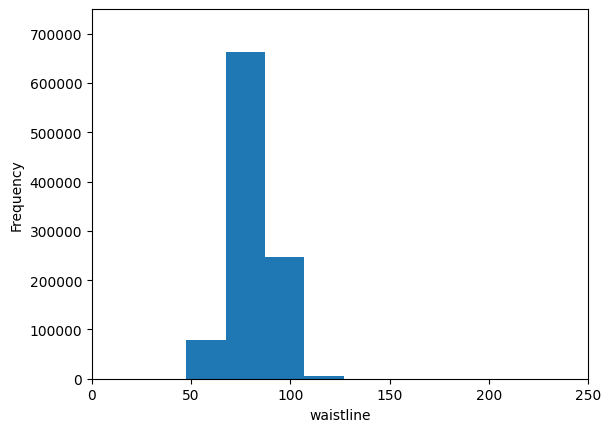

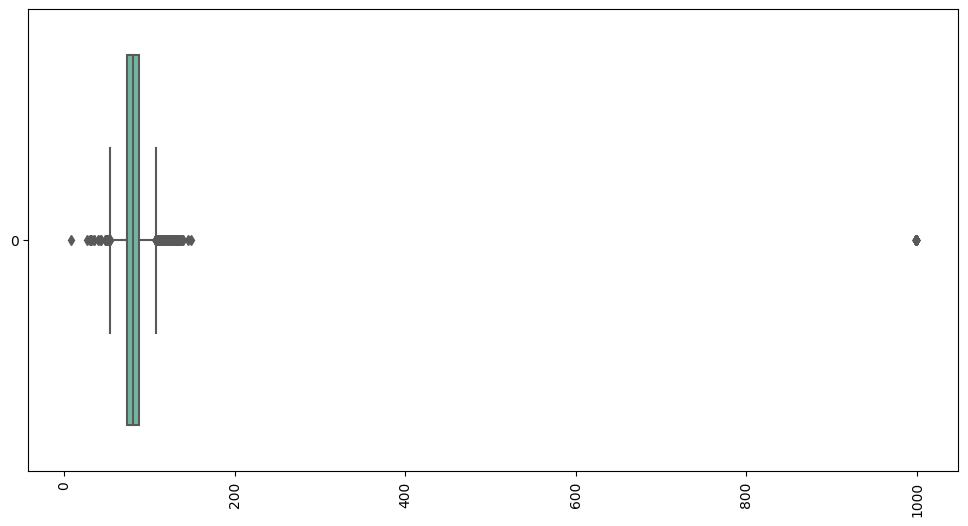

In [10]:
print(health.waistline.describe(),'\n')
plt.hist(health['waistline'], bins=50)
plt.xlabel('waistline')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 250)  # Set the x-axis scale (limits)
plt.ylim(0, 750000)       # Set the y-axis scale (limits)

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=health.waistline, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()


A person's waistline is often an indicator of abdominal obesity and can give us an idea about the person's metabolism and health. The distribution of waistline is also approximately bell shaped with a mean of 81.2 cm and standard deviation of 11.8 cm. The minimum waistline is 8 cm and maximum waistline is apparently 1000cm - this is most likely a data entry error and will be resolved later when we eliminate outliers. The maximum number of people are in the waistline range of 70-90 cm. Again most people are largely concentrated around the mean; as we move aweay from the mean, there is a higher chance of a person having a higher waistline than a lower waistline. There are a quite a few outliers in the waistline attribute.

count    991320.000000
mean          0.980833
std           0.605954
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: sight_left, dtype: float64 



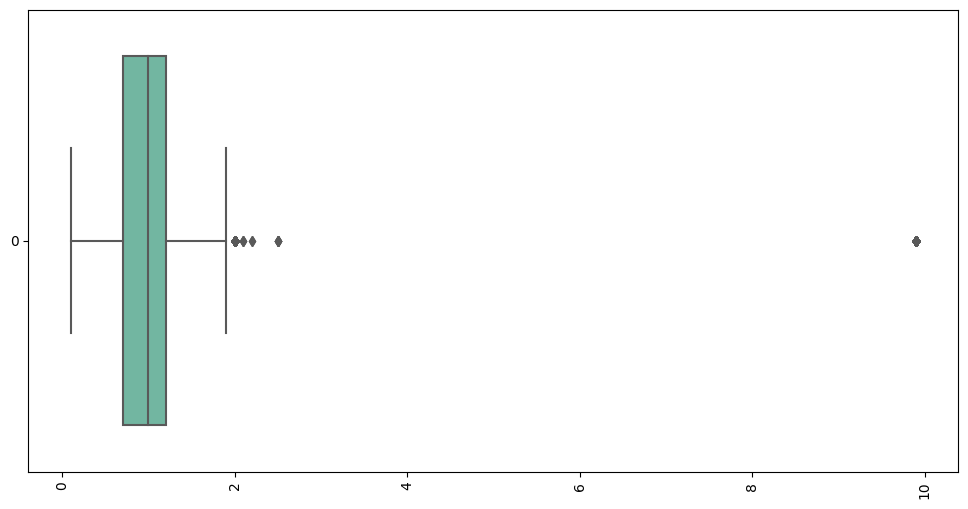

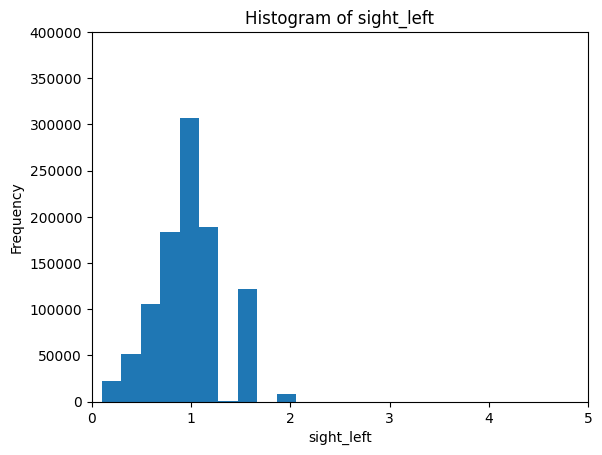

In [11]:
print(health.sight_left.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.sight_left, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['sight_left'], bins=50)
plt.title('Histogram of sight_left')
plt.xlabel('sight_left')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 5)  # Set the x-axis scale (limits)
plt.ylim(0, 400000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean          0.978428
std           0.604779
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: sight_right, dtype: float64 



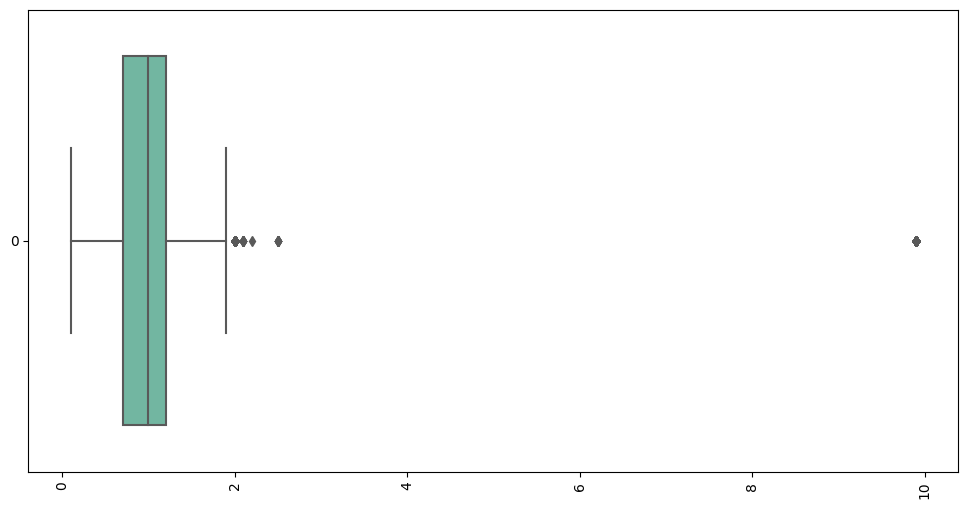

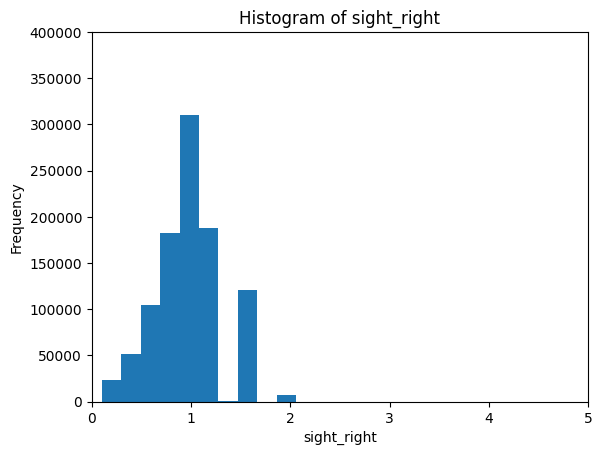

In [12]:
print(health.sight_right.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.sight_right, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['sight_right'], bins=50)
plt.title('Histogram of sight_right')
plt.xlabel('sight_right')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 5)  # Set the x-axis scale (limits)
plt.ylim(0, 400000)       # Set the y-axis scale (limits)

plt.show()

Here 1 indicates perfect eyesight - the majority of people possess near about perfect sight. Any deviations from that means imperfect vision. Again there are some outliers on the higher side.

count    991320.000000
mean        122.432360
std          14.543083
min          67.000000
25%         112.000000
50%         120.000000
75%         131.000000
max         273.000000
Name: SBP, dtype: float64 



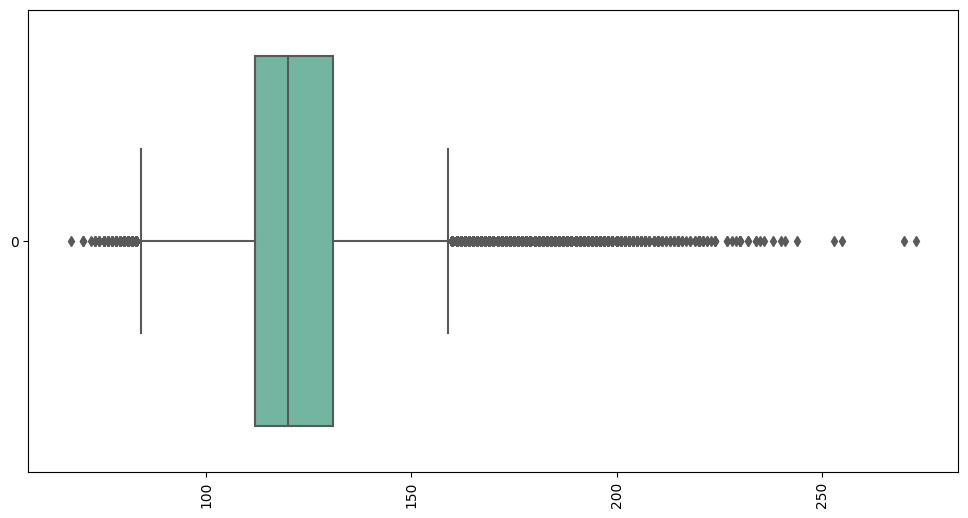

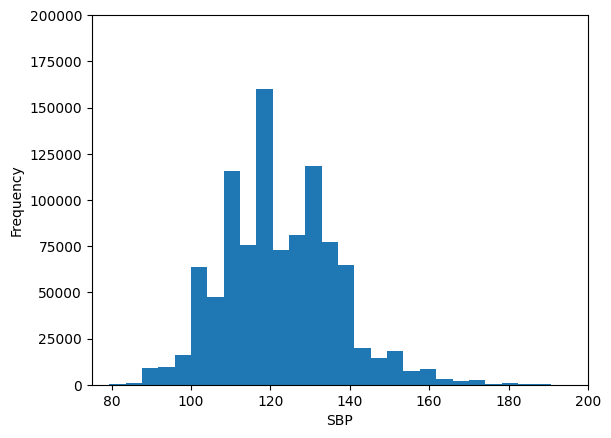

In [13]:
print(health.SBP.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.SBP, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['SBP'], bins=50)
plt.xlabel('SBP')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(75, 200)  # Set the x-axis scale (limits)
plt.ylim(0, 200000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean         76.052549
std           9.889334
min          32.000000
25%          70.000000
50%          76.000000
75%          82.000000
max         185.000000
Name: DBP, dtype: float64 



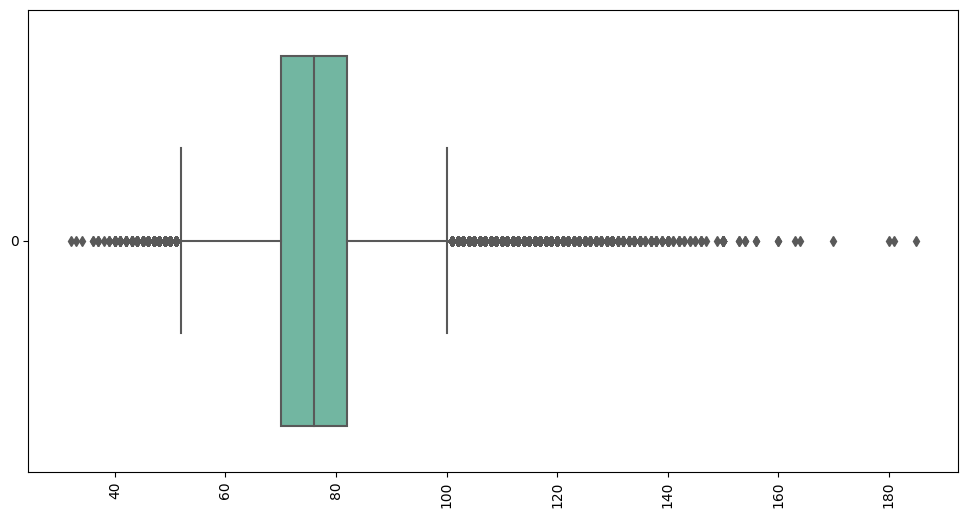

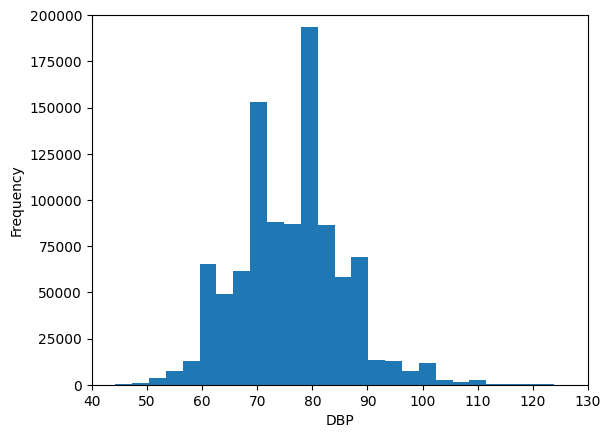

In [14]:
print(health.DBP.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.DBP, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['DBP'], bins=50)
plt.xlabel('DBP')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(40, 130)  # Set the x-axis scale (limits)
plt.ylim(0, 200000)       # Set the y-axis scale (limits)

plt.show()

Systolic and diastolic blood pressure are respectively the higher and lower blood pressures. These attributes are very widely distributed - in fact they have an extremely high number of outliers. Care will need to be taken while setting limits on outliers else it will need to extreme data loss.

count    991320.000000
mean        100.424305
std          24.179852
min          25.000000
25%          88.000000
50%          96.000000
75%         105.000000
max         852.000000
Name: BLDS, dtype: float64 



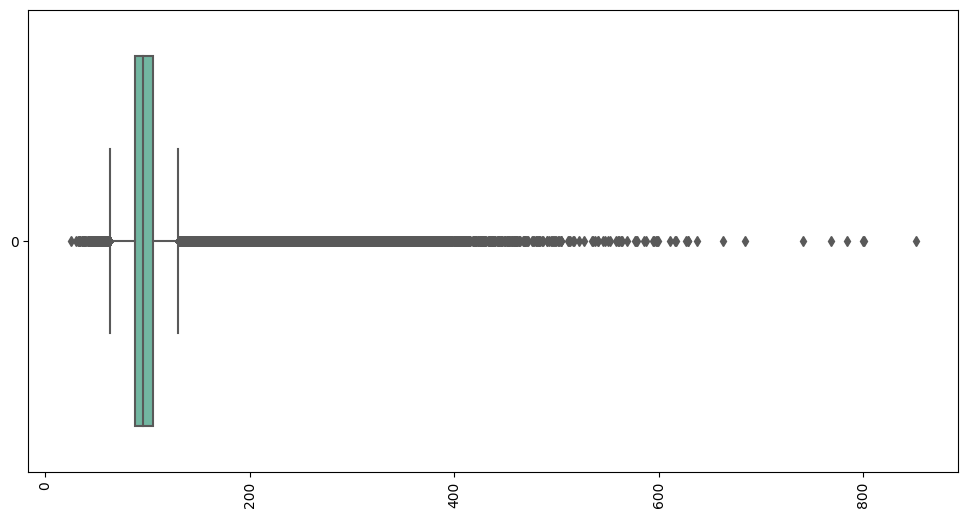

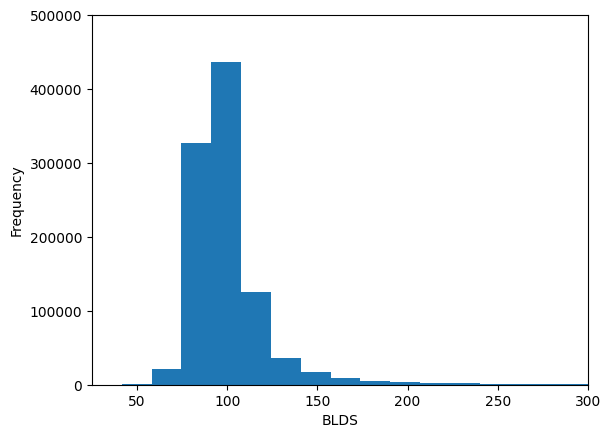

In [15]:
print(health.BLDS.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.BLDS, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['BLDS'], bins=50)
plt.xlabel('BLDS')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(25, 300)  # Set the x-axis scale (limits)
plt.ylim(0, 500000)       # Set the y-axis scale (limits)

plt.show()

BLDS indicates fasting blood glucose levels. Again while most people have normal (near about the mean) levels, there are an extremely large number of outliers, especially on the higher side. This is could be an indicator of diabetes - it may also indicate a conncection with the outliers in blood pressure. 

count    991320.000000
mean        195.556769
std          38.660092
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: tot_chole, dtype: float64 



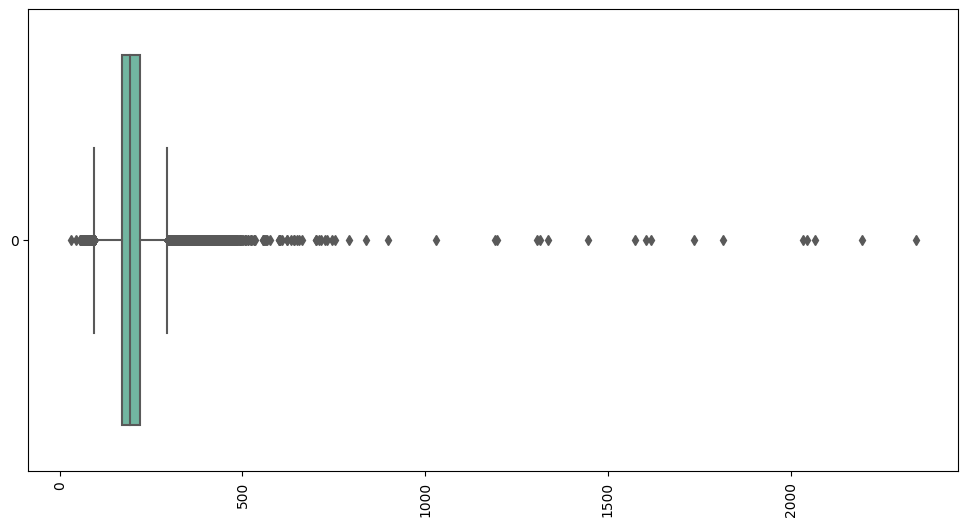

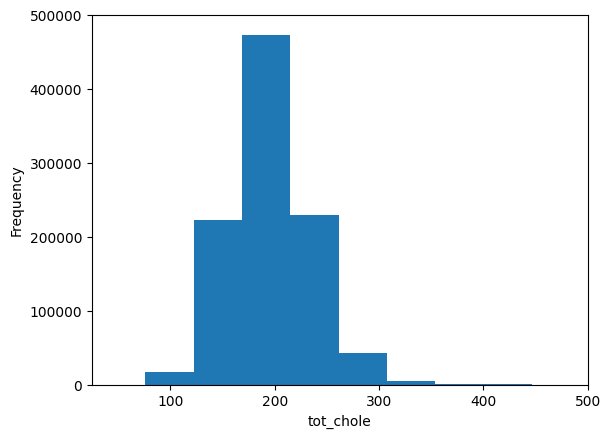

In [16]:
print(health.tot_chole.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.tot_chole, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['tot_chole'], bins=50)
plt.xlabel('tot_chole')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(25, 500)  # Set the x-axis scale (limits)
plt.ylim(0, 500000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean         56.936984
std          17.238578
min           1.000000
25%          46.000000
50%          55.000000
75%          66.000000
max        8110.000000
Name: HDL_chole, dtype: float64 



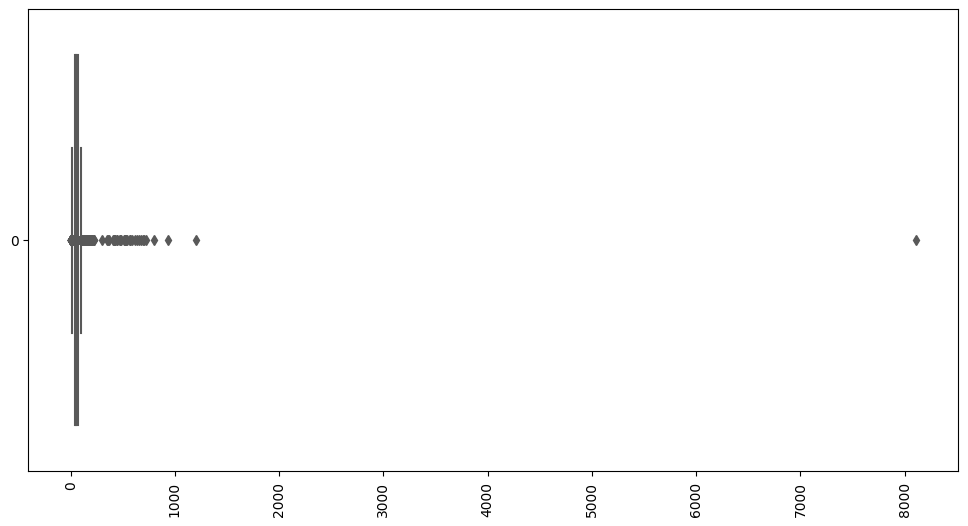

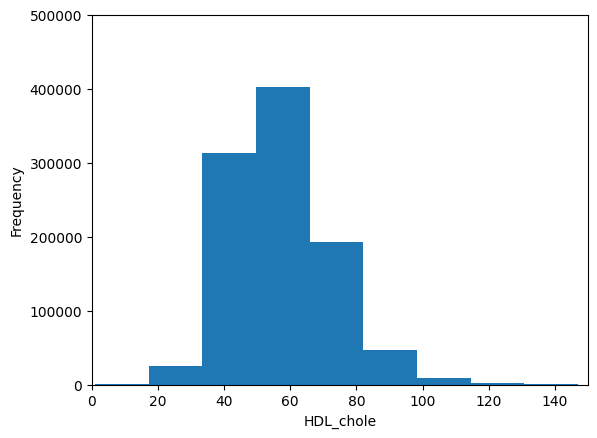

In [17]:
print(health.HDL_chole.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.HDL_chole, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['HDL_chole'], bins=500)
plt.xlabel('HDL_chole')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 150)  # Set the x-axis scale (limits)
plt.ylim(0, 500000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean        113.037429
std          35.842938
min           1.000000
25%          89.000000
50%         111.000000
75%         135.000000
max        5119.000000
Name: LDL_chole, dtype: float64 



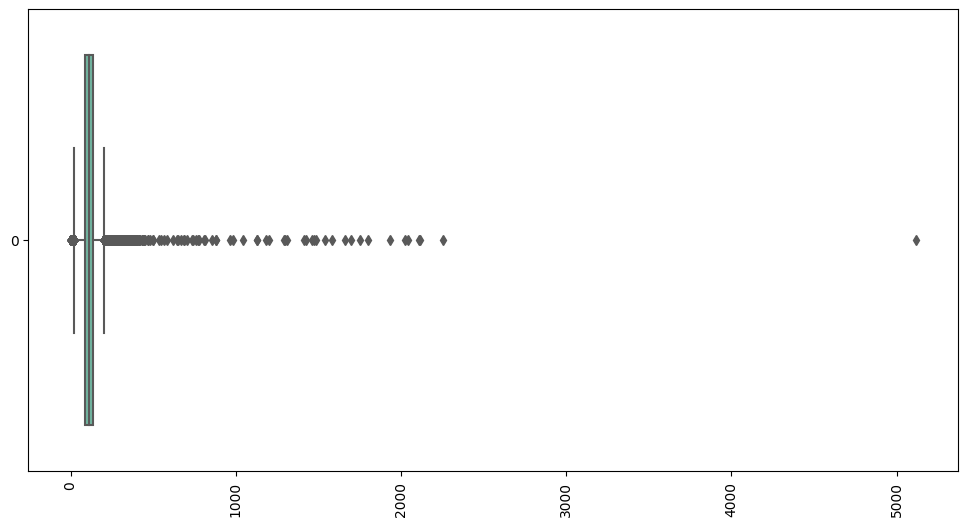

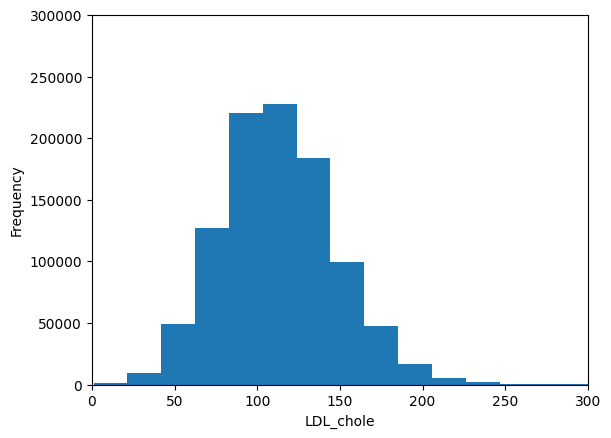

In [18]:
print(health.LDL_chole.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.LDL_chole, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['LDL_chole'], bins=250)
plt.xlabel('LDL_chole')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 300)  # Set the x-axis scale (limits)
plt.ylim(0, 300000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean        132.140030
std         102.194762
min           1.000000
25%          73.000000
50%         106.000000
75%         159.000000
max        9490.000000
Name: triglyceride, dtype: float64 



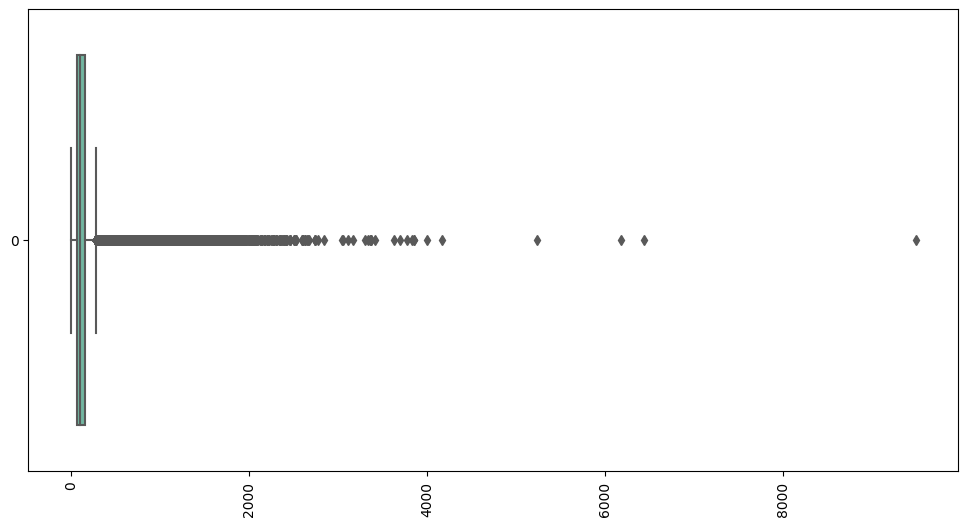

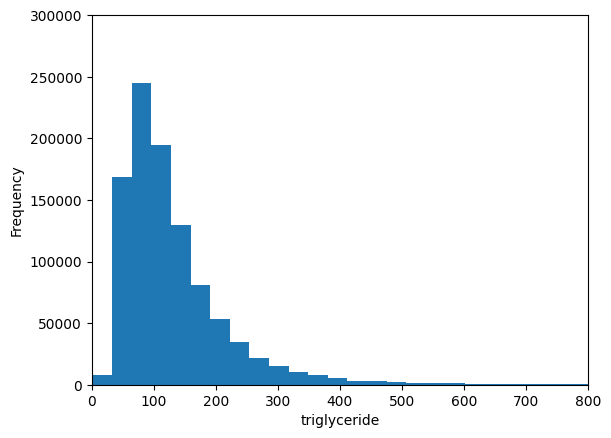

In [19]:
print(health.triglyceride.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.triglyceride, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()
plt.hist(health['triglyceride'], bins=300)
plt.xlabel('triglyceride')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 800)  # Set the x-axis scale (limits)
plt.ylim(0, 300000)       # Set the y-axis scale (limits)

plt.show()

tot_chole, HDL_chole, LDL_chole are all cholestrol readings - total, high density and low density respectively. These along with triglyceride levels are often taken in a lipid profile of a patient. They are realted to cardiovascular health and are often affected by lifestyle i.e. smoking and drinking are likely to have a large impact on it. Again there are a large number of outliers on the higher side. This corresponds to our high number of outliers in BP and blood glucose.

count    991320.000000
mean         14.229810
std           1.584924
min           1.000000
25%          13.200000
50%          14.300000
75%          15.400000
max          25.000000
Name: hemoglobin, dtype: float64 



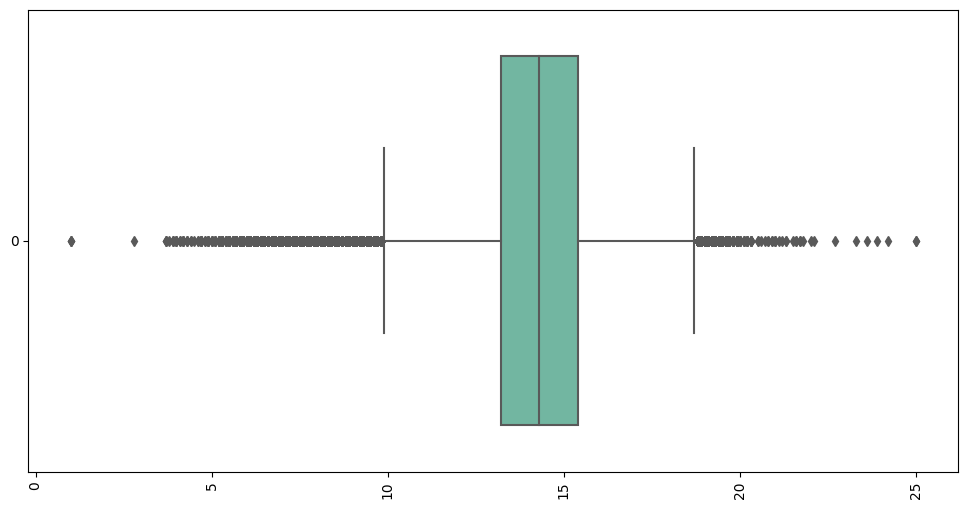

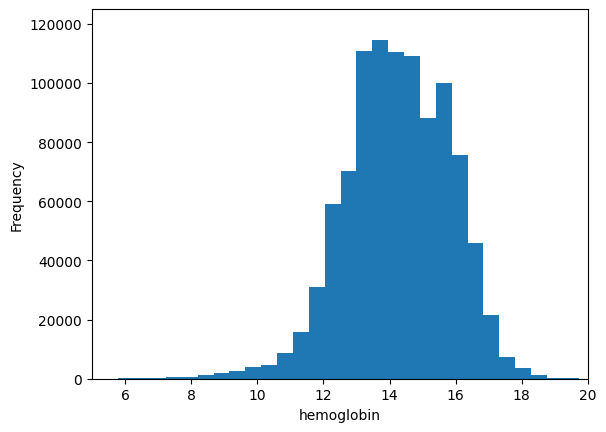

In [20]:
print(health.hemoglobin.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.hemoglobin, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['hemoglobin'], bins=50)
plt.xlabel('hemoglobin')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(5, 20)  # Set the x-axis scale (limits)
plt.ylim(0, 125000)       # Set the y-axis scale (limits)

plt.show()

Hemoglobin is slightly bell shaped with a mean of 14.2 g/dL and standard deviation of 1.6 g/dL. The minimum hemoglobin is 1 g/dL and maximum hemoglobin is 25 g/dL. The maximum number of people are in the hemoglobin range of 13-15 g/dL. Again most people are largely concentrated around the mean. There is one key difference here from the other attributes seen so far - there are a larger number of outliers on the lower side than on the higher side.

count    991320.000000
mean          1.094221
std           0.437719
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: urine_protein, dtype: float64 



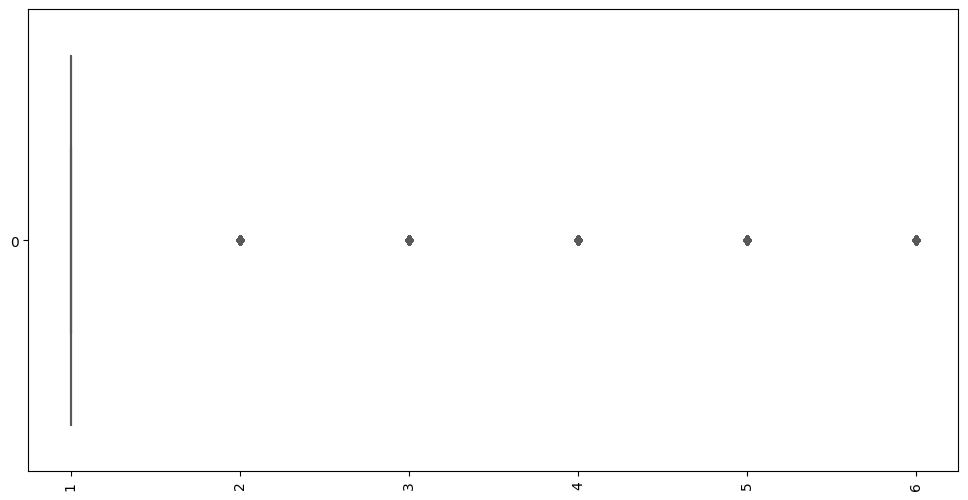

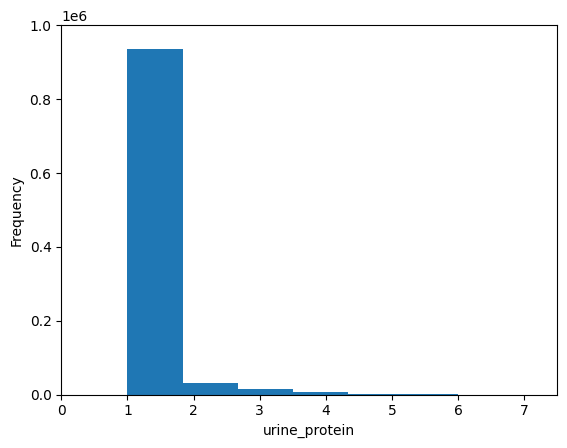

In [21]:
print(health.urine_protein.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.urine_protein, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['urine_protein'], bins=6)
plt.xlabel('urine_protein')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 7.5)  # Set the x-axis scale (limits)
plt.ylim(0, 1000000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean          0.860467
std           0.480536
min           0.100000
25%           0.700000
50%           0.800000
75%           1.000000
max          98.000000
Name: serum_creatinine, dtype: float64 



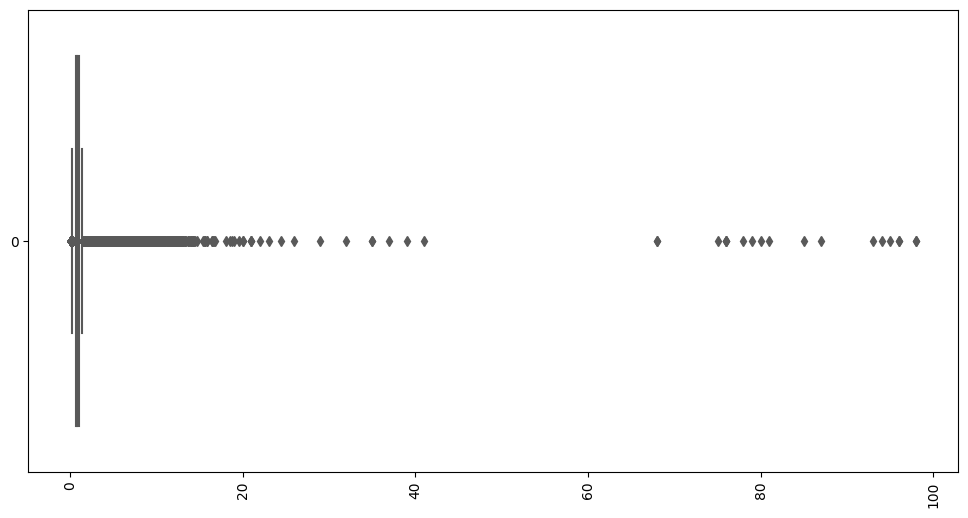

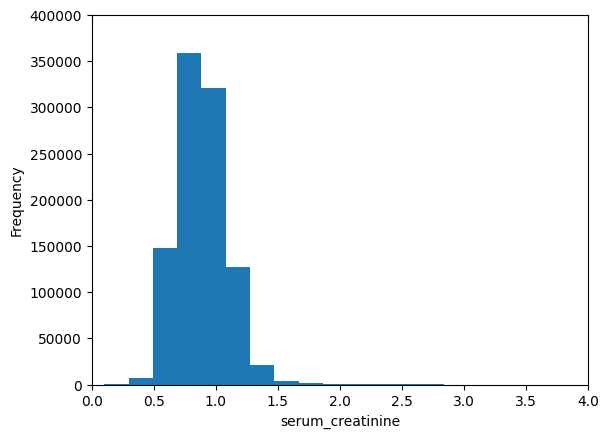

In [22]:
print(health.serum_creatinine.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.serum_creatinine, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['serum_creatinine'], bins=500)
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 4)  # Set the x-axis scale (limits)
plt.ylim(0, 400000)       # Set the y-axis scale (limits)

plt.show()

Both urine protein and serum creatinine are indicators of kidney health. For urine protein, a score of 1 is considered healthy while as the score increases it indicates a higher level of protein in the urine - a score greater than 3 or 4 indicates a serious medical conditon. Maximum number of people have a score of 1 with a very small number of outliers on the higher side. Serum creatinine however shows a significant number of outliers on the higher side.

count    991320.000000
mean         25.989424
std          23.493668
min           1.000000
25%          19.000000
50%          23.000000
75%          28.000000
max        9999.000000
Name: SGOT_AST, dtype: float64 



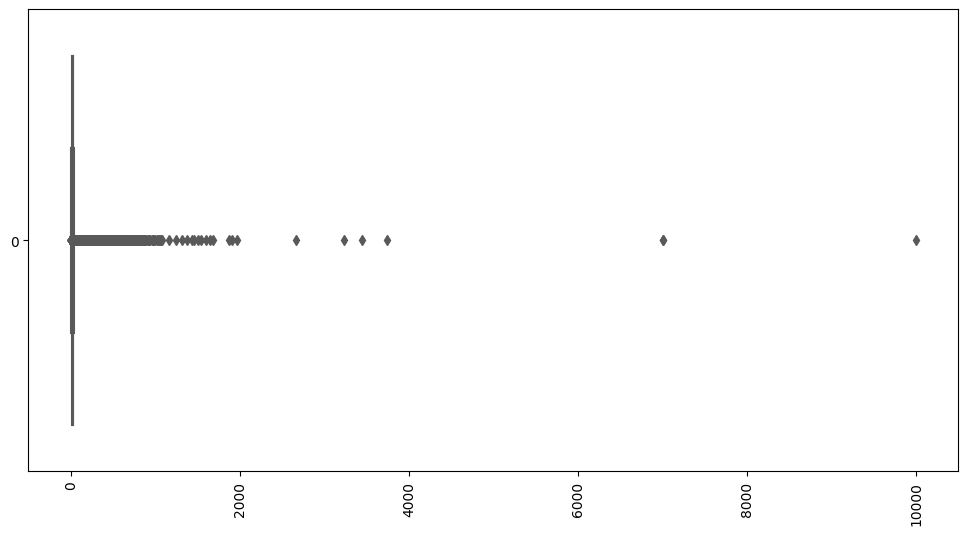

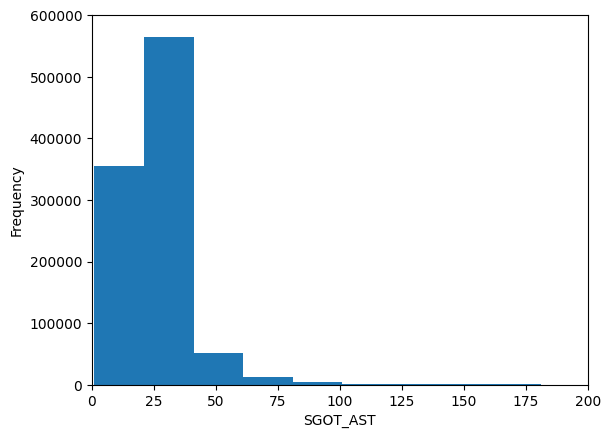

In [23]:
print(health.SGOT_AST.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.SGOT_AST, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['SGOT_AST'], bins=500)
plt.xlabel('SGOT_AST')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 200)  # Set the x-axis scale (limits)
plt.ylim(0, 600000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean         25.755148
std          26.308910
min           1.000000
25%          15.000000
50%          20.000000
75%          29.000000
max        7210.000000
Name: SGOT_ALT, dtype: float64 



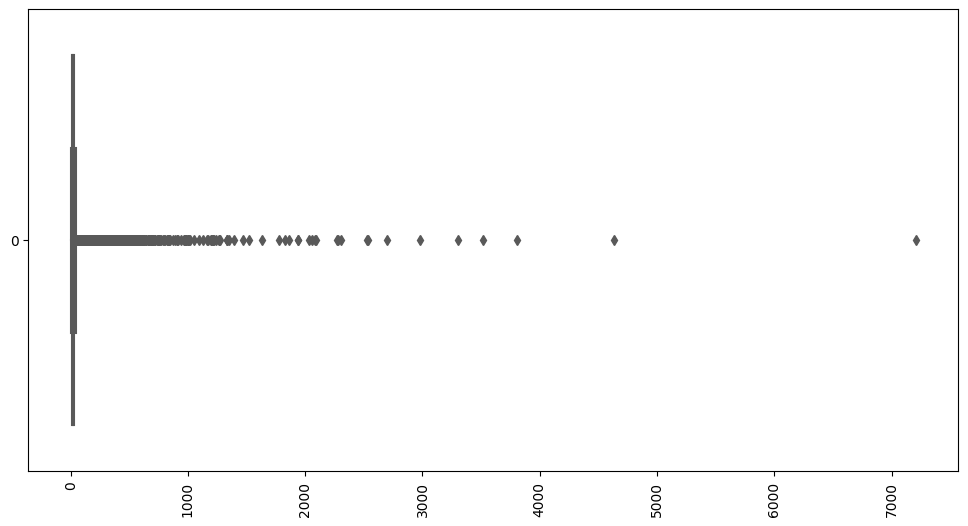

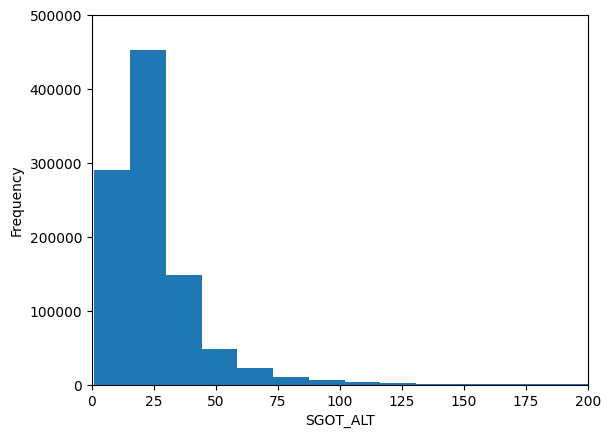

In [24]:
print(health.SGOT_ALT.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.SGOT_ALT, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['SGOT_ALT'], bins=500)
plt.xlabel('SGOT_ALT')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 200)  # Set the x-axis scale (limits)
plt.ylim(0, 500000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean         37.136152
std          50.423811
min           1.000000
25%          16.000000
50%          23.000000
75%          39.000000
max         999.000000
Name: gamma_GTP, dtype: float64 



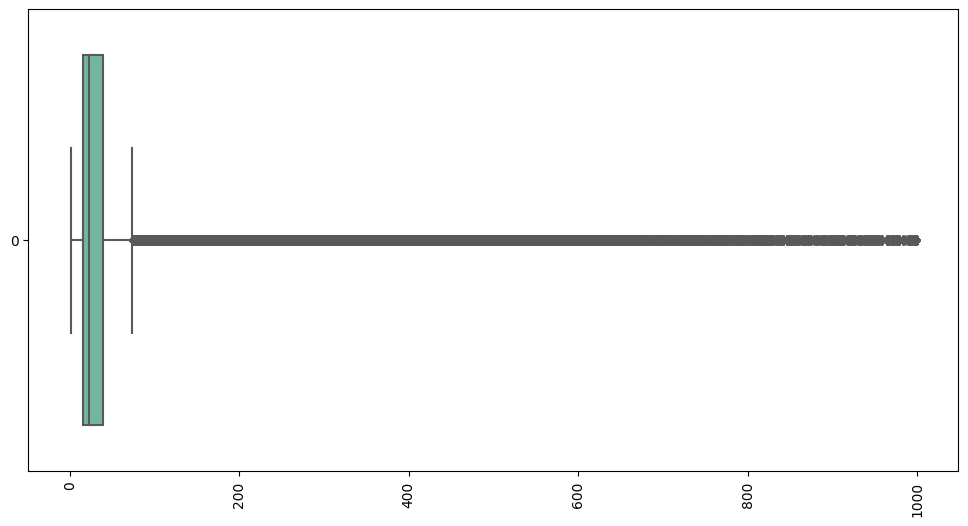

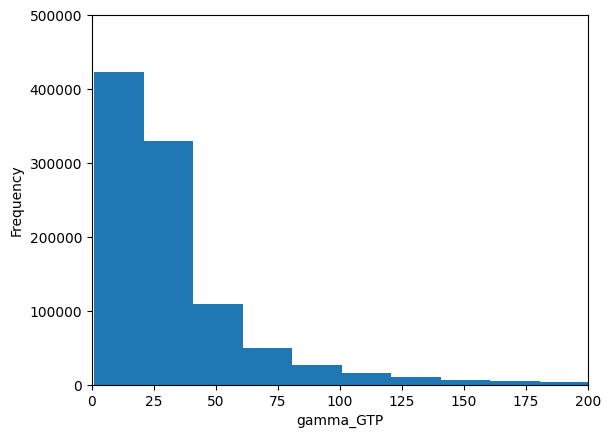

In [25]:
print(health.gamma_GTP.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.gamma_GTP, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['gamma_GTP'], bins=50)
plt.xlabel('gamma_GTP')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 200)  # Set the x-axis scale (limits)
plt.ylim(0, 500000)       # Set the y-axis scale (limits)

plt.show()

SGOT_ALT, gamma GTP and SGOT_AST are enzymes and their counts are parameters that tell us about the health of the liver. They all have a large number of outliers on the higher side. A higher count of GTP is often seen in heavy drinkers. ALT and AST are often used a ratio in medical tests.

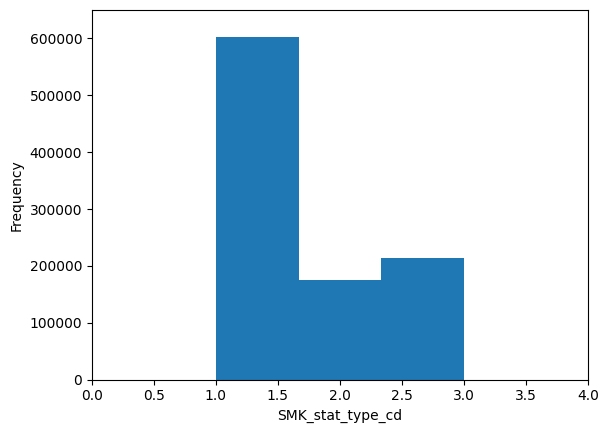

In [26]:
plt.hist(health['SMK_stat_type_cd'], bins=3)
plt.xlabel('SMK_stat_type_cd')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 4)  # Set the x-axis scale (limits)
plt.ylim(0, 650000)       # Set the y-axis scale (limits)

plt.show()

Smoking status is of 3 types -
1 = never smoked
2 = former smoker
3 = current smoker
The bulk of the peopel are of category 1, while there are an approximatelty even number of peopel between category 2 and 3.

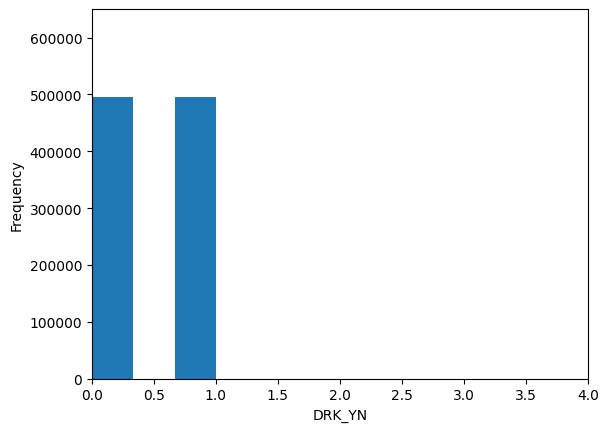

In [27]:
plt.hist(health['DRK_YN'], bins=3)
plt.xlabel('DRK_YN')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 4)  # Set the x-axis scale (limits)
plt.ylim(0, 650000)       # Set the y-axis scale (limits)

plt.show()

The target attribute is well balanced with almost equal number of drinkers and non-drinkers.

We will now add some new features to our dataset. These will be based on the existing features and will be used to train our model.
1. BMI = weight / height^2
2. SGOT_ratio = SGOT_ALT / SGOT_AST : <1,>1
3. chole_ratio = total_chole / HDL_chole : <3.5;3.5<,<5;5<

In [28]:
# Create the new columns
health['BMI'] = health['weight'] / (health['height'] / 100) ** 2 
health['SGOT_ratio'] = health['SGOT_ALT'] / health['SGOT_AST'] # DeRitis ratio
health['chole_ratio'] = health['tot_chole'] / health['HDL_chole']

# Check the updated DataFrame
print(health.head())  # Display the first few rows to verify the new columns


   sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0          1   
1    1   30     180      80       89.0         0.9          1.2          1   
2    1   40     165      75       91.0         1.2          1.5          1   
3    1   50     175      80       91.0         1.5          1.2          1   
4    1   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0           1  120  ...              1               1.0        21        35   
1           1  130  ...              1               0.9        20        36   
2           1  120  ...              1               0.9        47        32   
3           1  145  ...              1               1.1        29        34   
4           1  138  ...              1               0.8        19        12   

   gamma_GTP  SMK_stat_type_cd  DRK_YN        BMI 

count    991320.000000
mean         23.917088
std           3.514999
min          12.486993
25%          21.484375
50%          23.875115
75%          25.951557
max          45.714286
Name: BMI, dtype: float64 



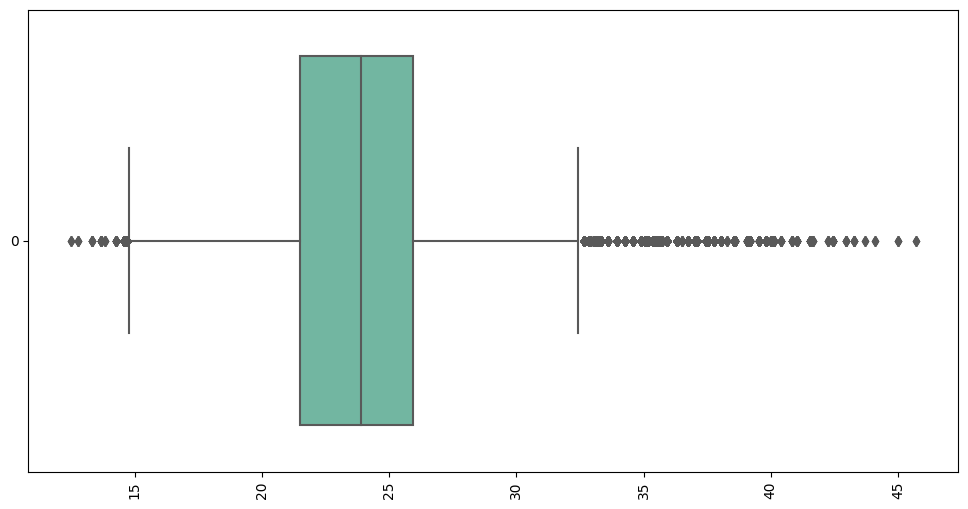

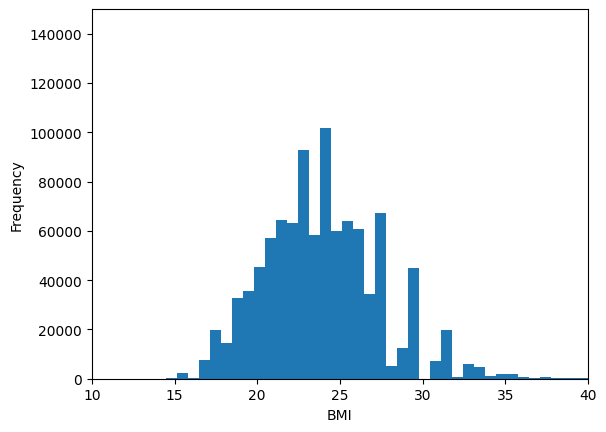

In [29]:
print(health.BMI.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.BMI, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['BMI'], bins=50)
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(10, 40)  # Set the x-axis scale (limits)
plt.ylim(0, 150000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean          0.962659
std           0.455990
min           0.001236
25%           0.705882
50%           0.884615
75%           1.137931
max         148.846154
Name: SGOT_ratio, dtype: float64 



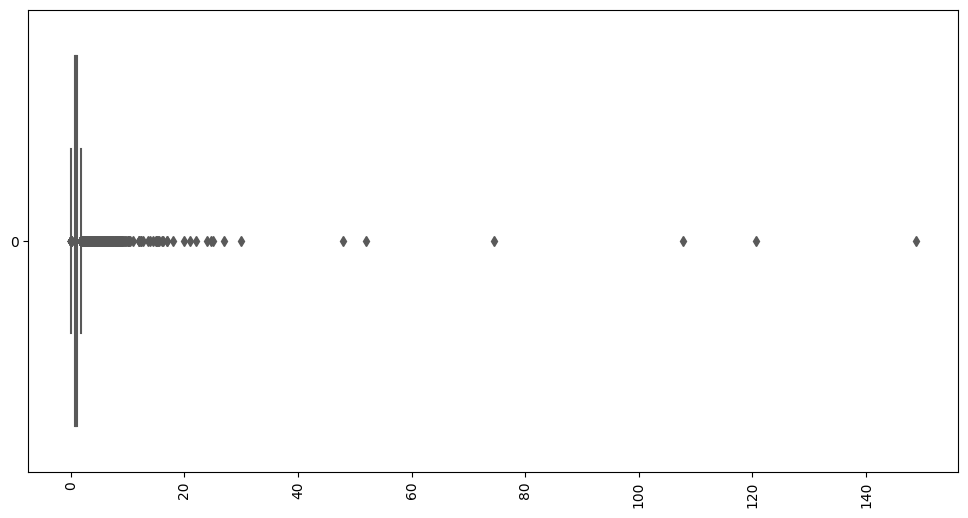

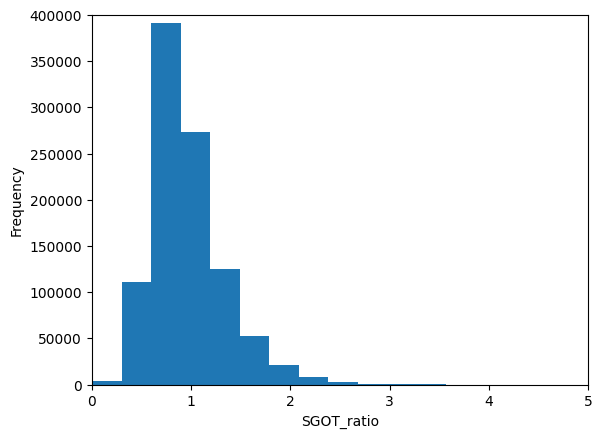

In [30]:
print(health.SGOT_ratio.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.SGOT_ratio, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['SGOT_ratio'], bins=500)
plt.xlabel('SGOT_ratio')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 5)  # Set the x-axis scale (limits)
plt.ylim(0, 400000)       # Set the y-axis scale (limits)

plt.show()

count    991320.000000
mean          3.647874
std           2.878656
min           0.155887
25%           2.828125
50%           3.465517
75%           4.272727
max        2046.000000
Name: chole_ratio, dtype: float64 



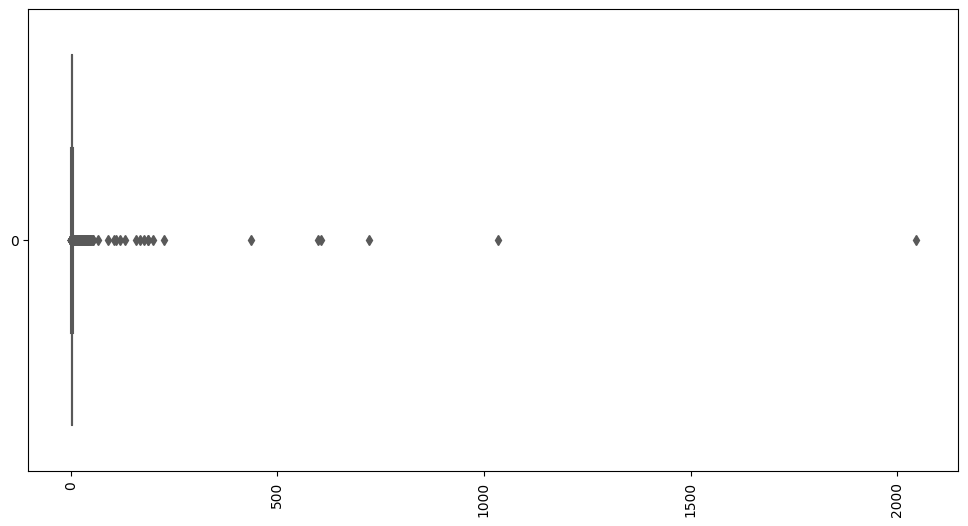

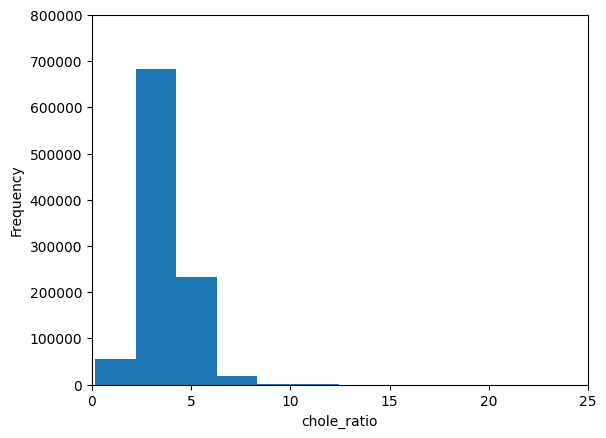

In [31]:
print(health.chole_ratio.describe(),'\n')

plt.figure(figsize=(12, 6))
sns.boxplot(data=health.chole_ratio, orient="h", palette="Set2")
plt.xticks(rotation=90)
plt.show()

plt.hist(health['chole_ratio'], bins=1000)
plt.xlabel('chole_ratio')
plt.ylabel('Frequency')

# Adjust the x-axis and y-axis scale for this histogram
plt.xlim(0, 25)  # Set the x-axis scale (limits)
plt.ylim(0, 800000)       # Set the y-axis scale (limits)

plt.show()

We will now create a heatmap to see the correlation between the attributes.

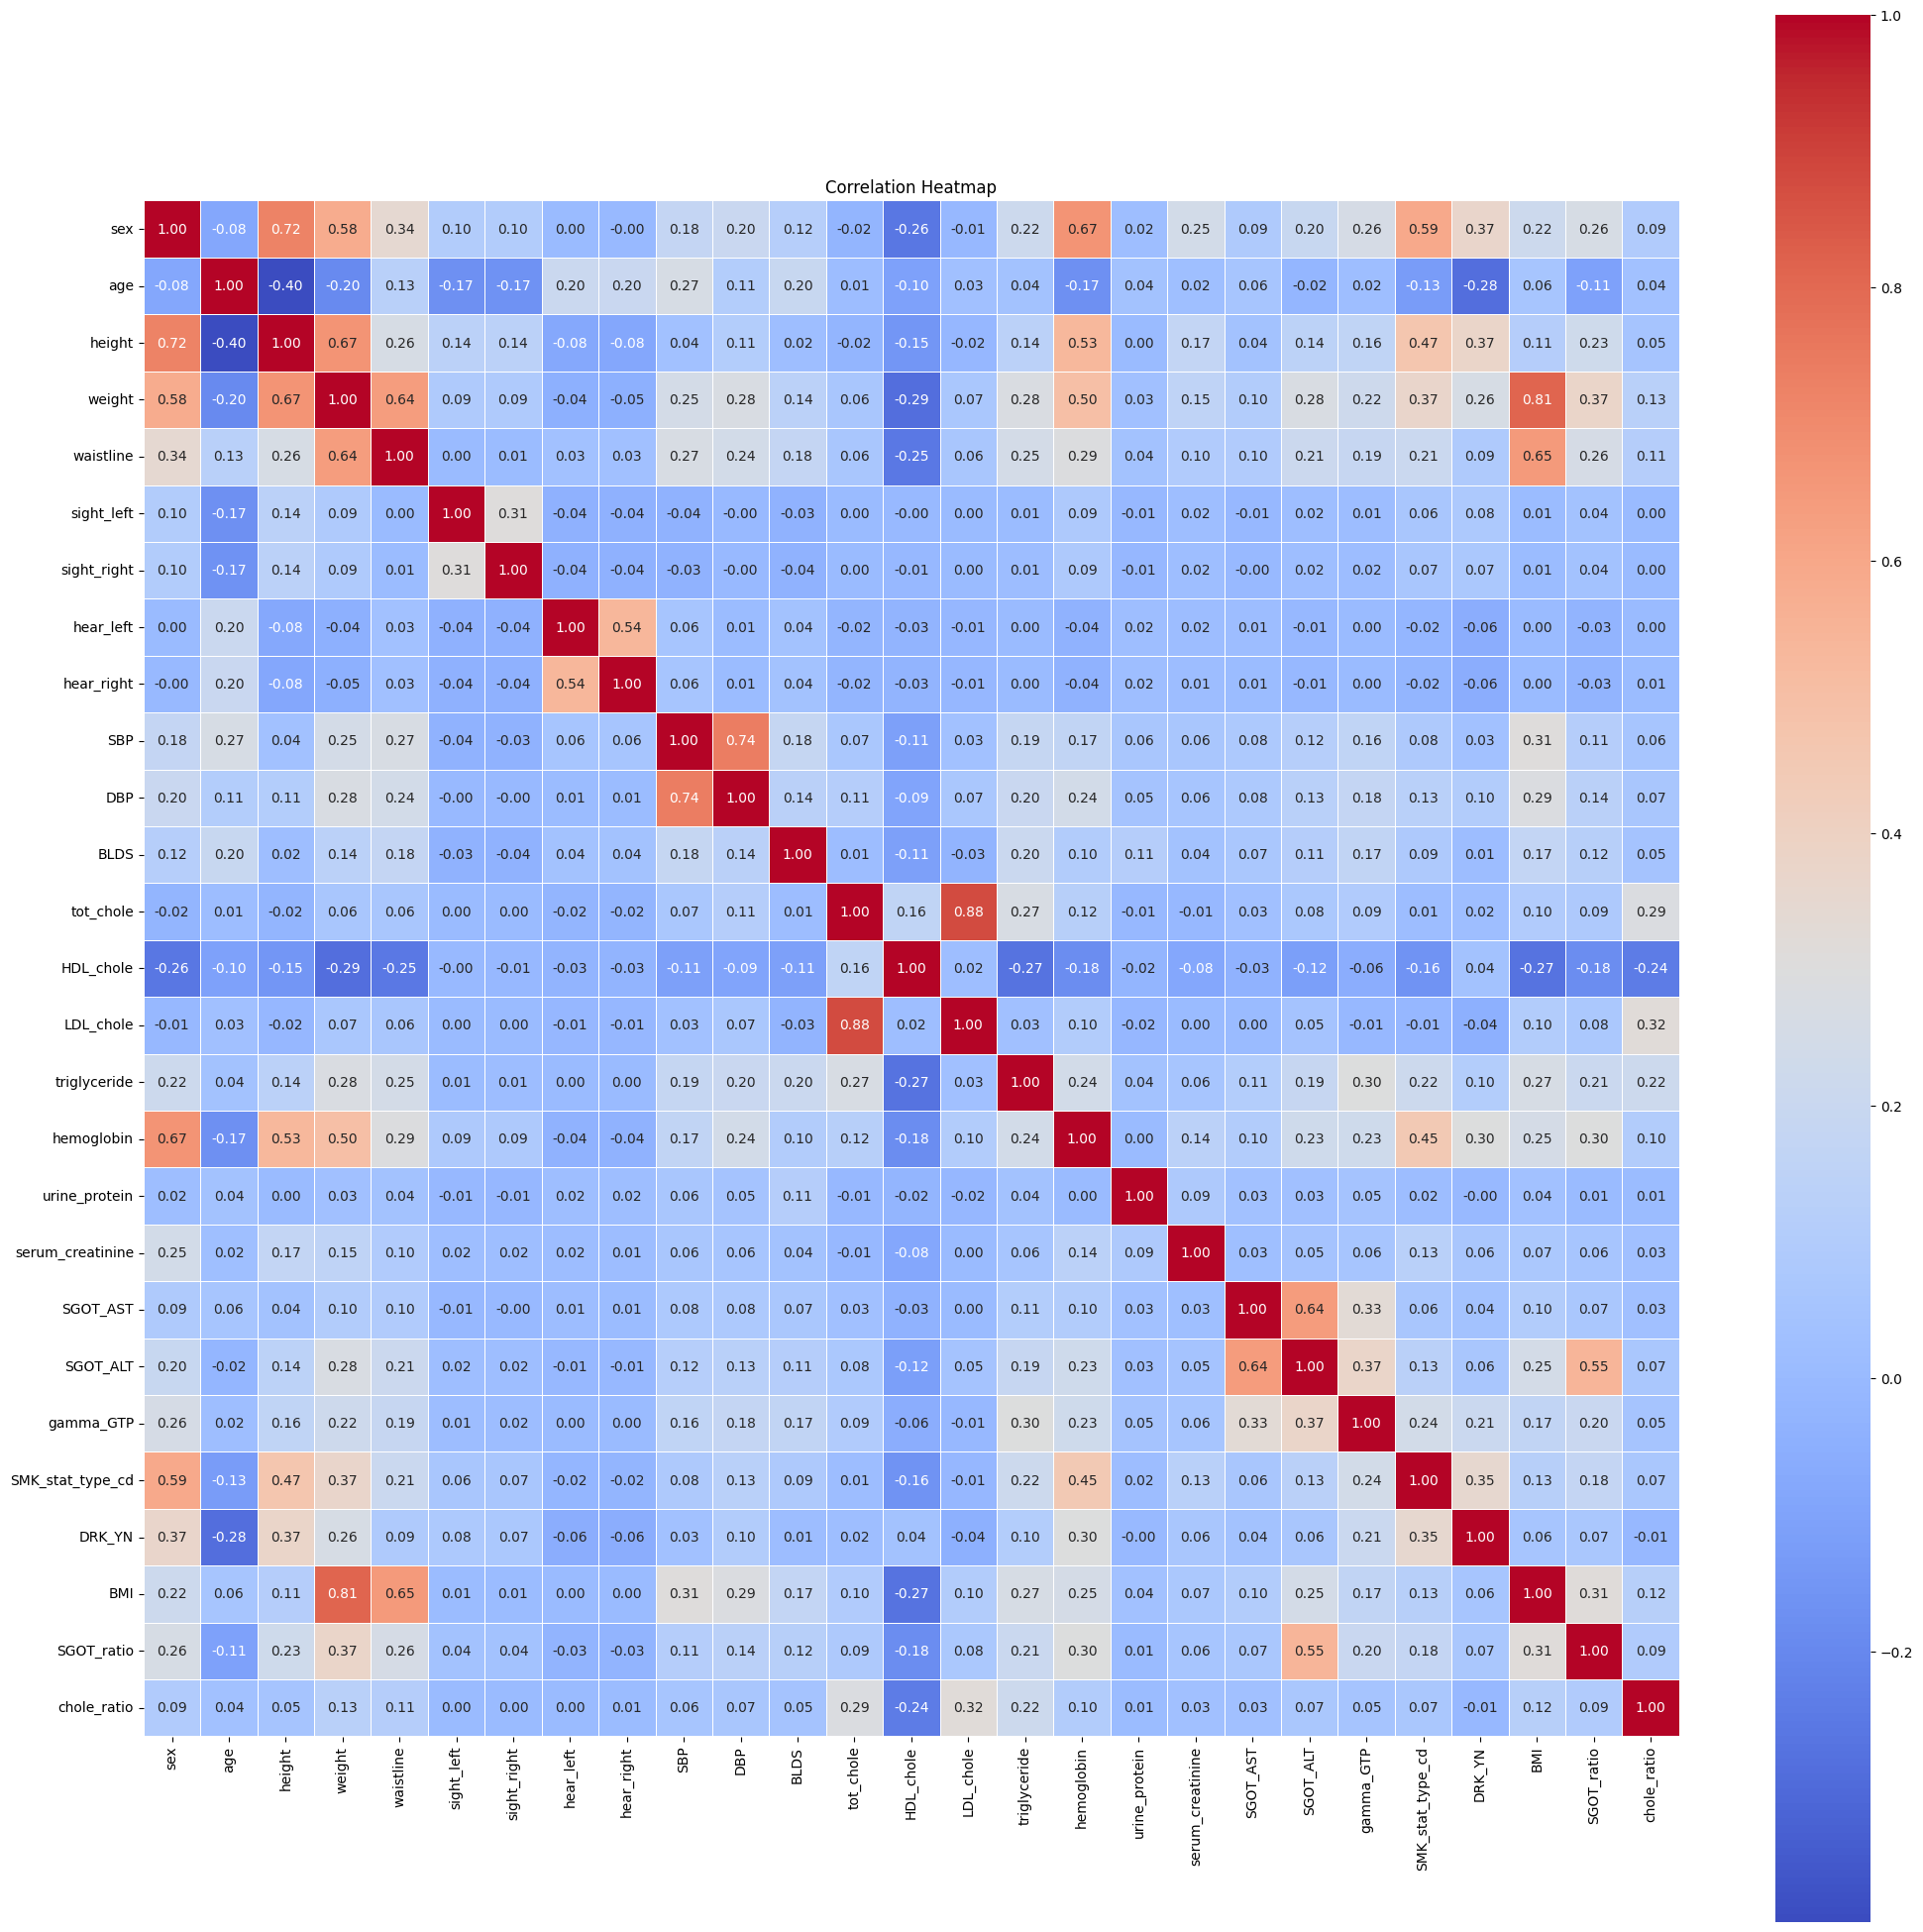

In [32]:
correlation_matrix = health.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(25, 25))  # Adjust the figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values on the heatmap
    cmap='coolwarm',  # Choose a color map
    fmt=".2f",  # Format the annotation values with two decimal places
    square=True,  # Make the heatmap square
    linewidths=0.5,  # Add linewidths between cells
)

# Set the heatmap title (replace 'Correlation Heatmap' with your preferred title)
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

Heatmaps give us insights into linear relationships within variables. The darker the shade of red, the higher the correlation. The darker the shade of blue, the lower the correlation. The diagonal is always 1 as it is the correlation of an attribute with itself. The heatmap is symmetric about the diagonal. It cannot however, tell us if a non linear relation exists between 2 variables.

We will now create count plots to see the relationship between some attributes. We create count plots of SMK_type_stat_CD and DRK_YN with each other and with other attributes like gamma_GTP, SGOT_ratio, hemoglobin, sex and height.

We see that the number of drinkers is higher in the current smokers category than in the former smokers category. The number of drinkers is the lowest in the no-smokers category. This is also a good indicator that smoking and drinking are related to each other.

The gamma_GTP graph is quite interesting. We see that the number of drinkers and smokers is higher in the lower gamma_GTP category than in the higher gamma_GTP category.

We cannot derive any meaningful result from the graphs of SGOT_ratio.

The graphs of hemoglobin have an approximate normal distribution for almost all catgories.

The graphs indicate men in general smoke and drink more than women.





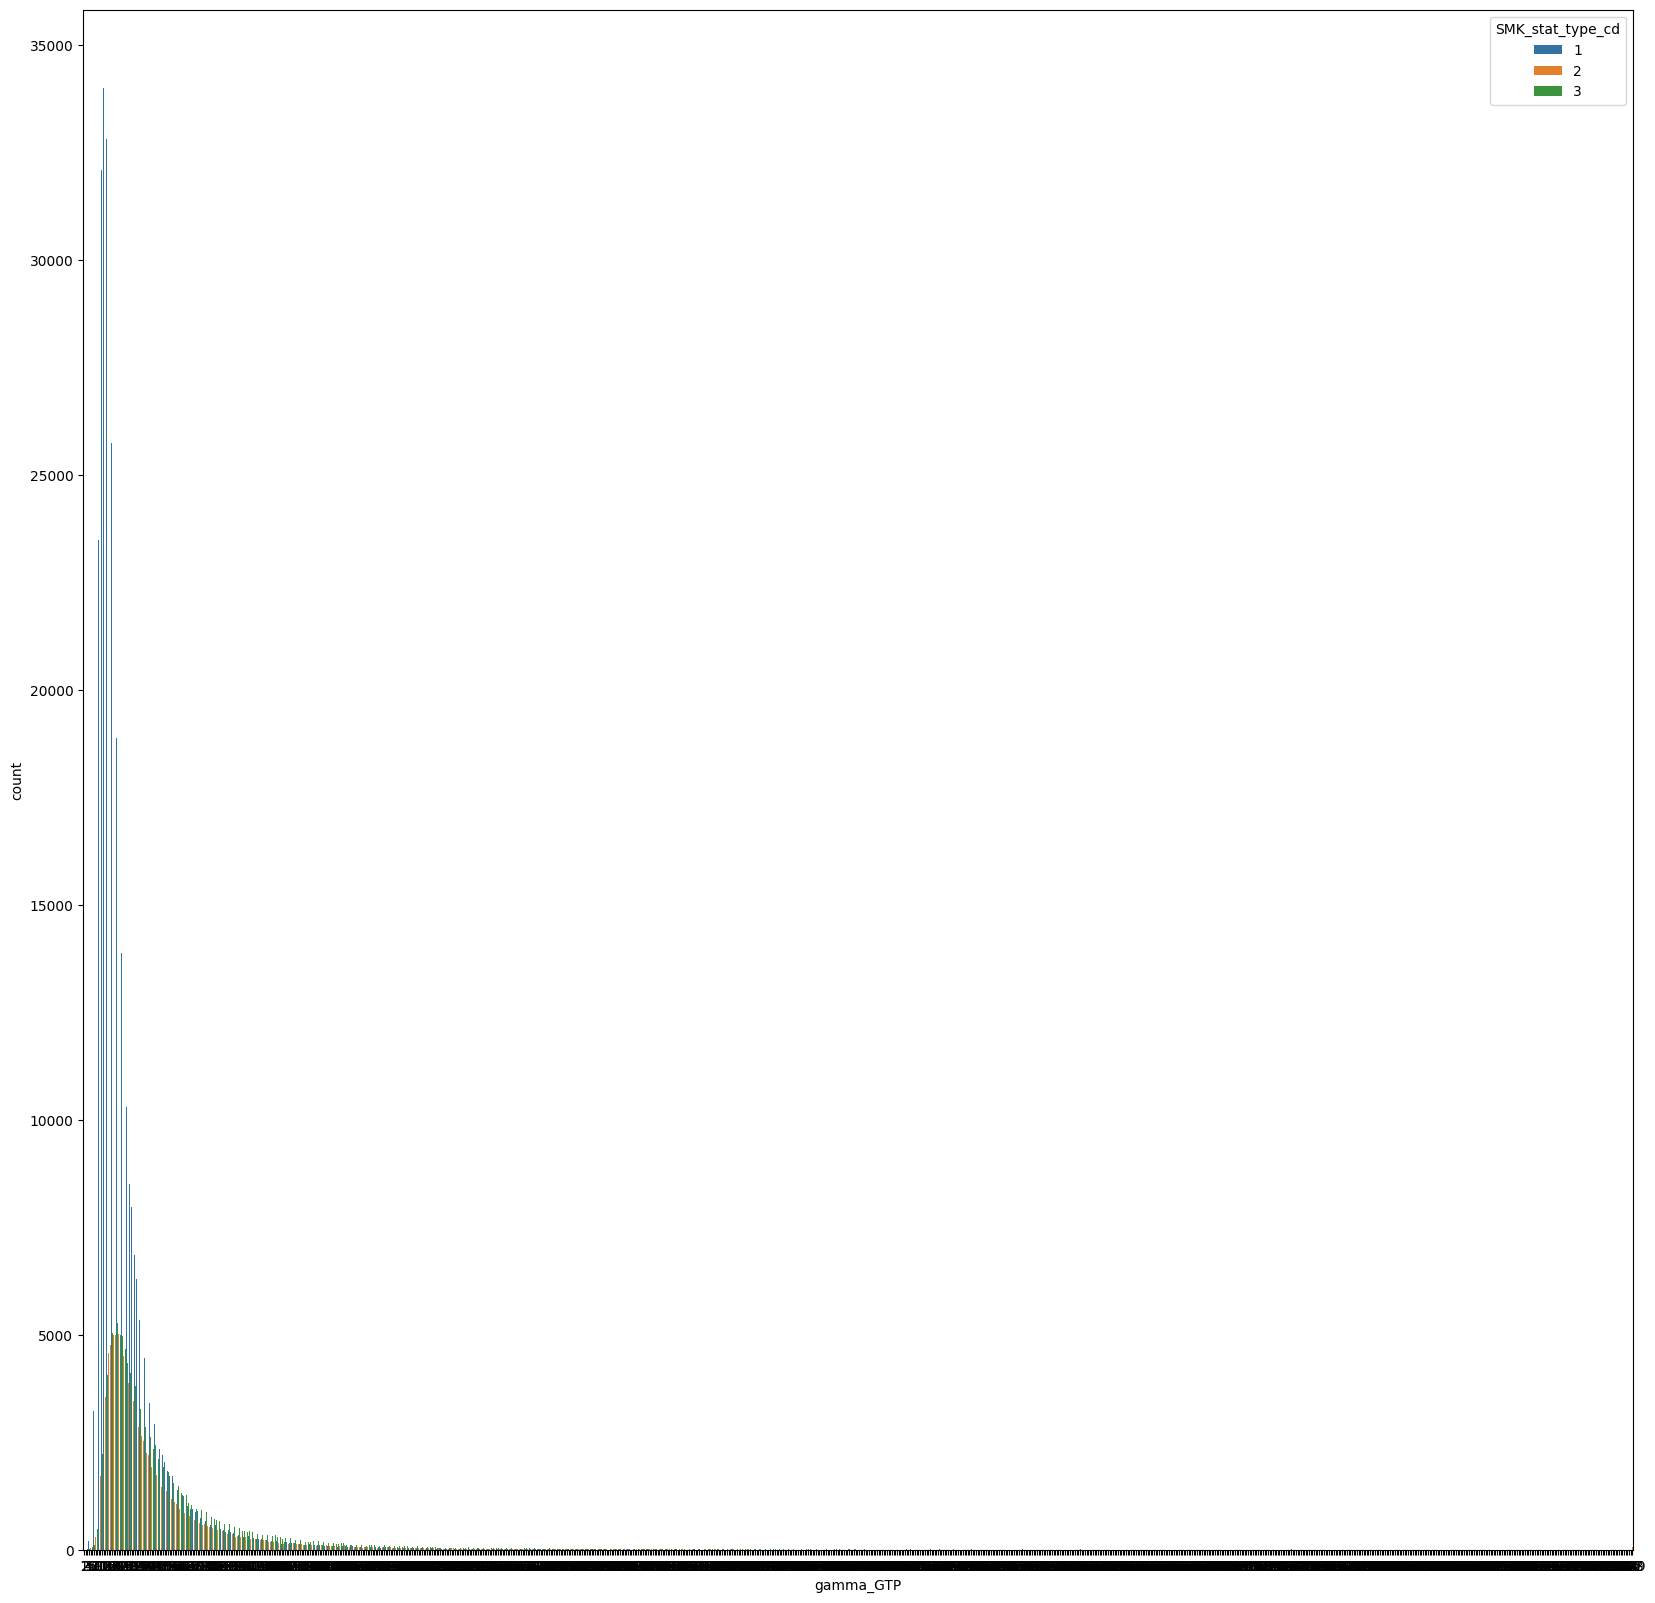

In [33]:
plt.figure(figsize=(20, 20))
sns.countplot(x='gamma_GTP', hue='SMK_stat_type_cd', data=health)
plt.show()


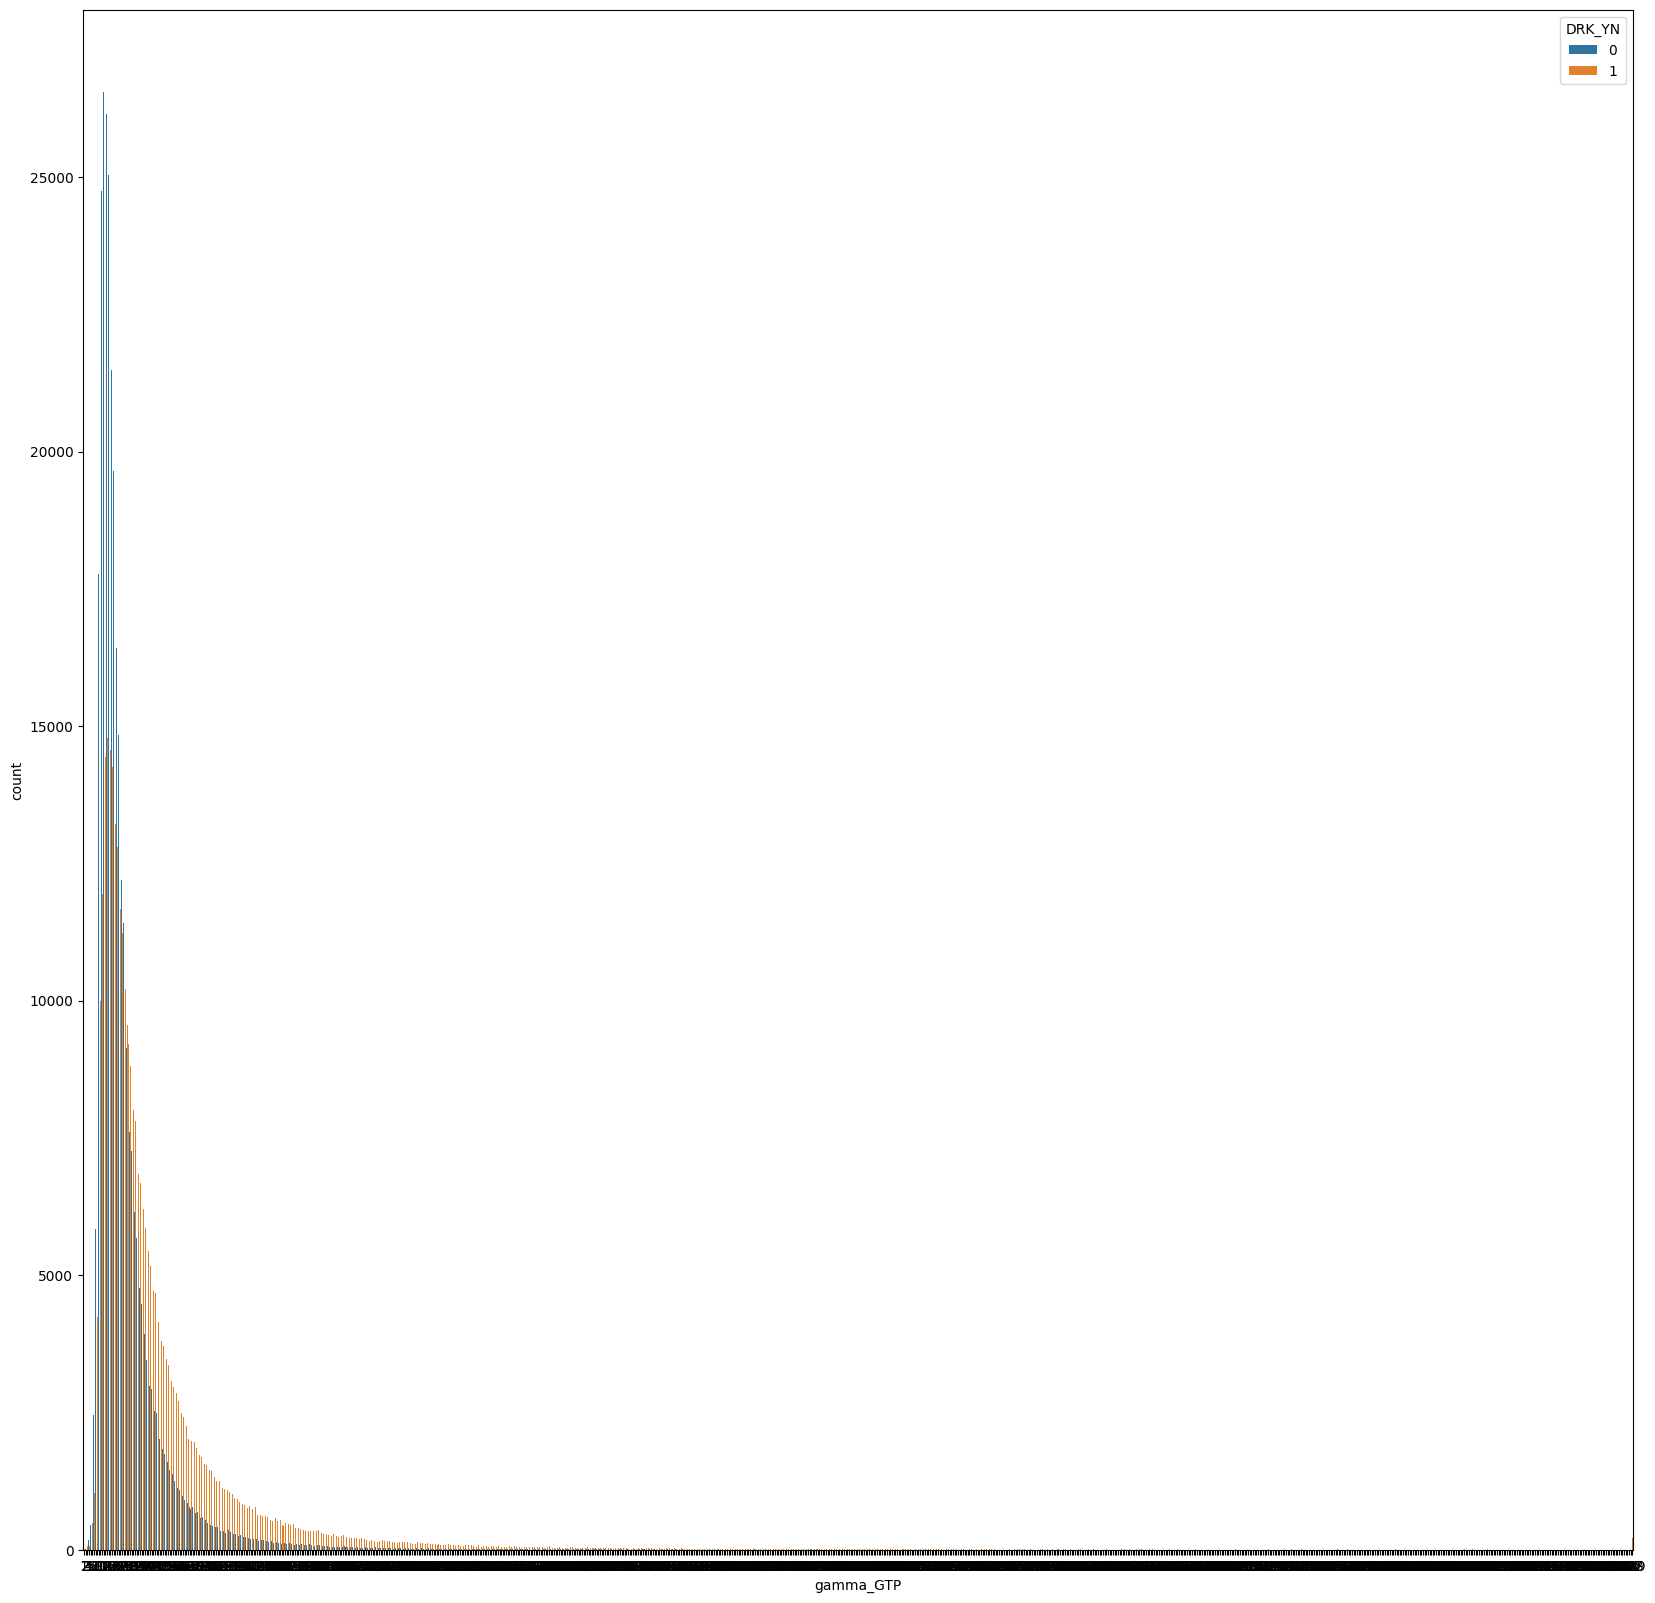

In [34]:
plt.figure(figsize=(20, 20))
sns.countplot(x='gamma_GTP', hue='DRK_YN', data=health)
plt.show()


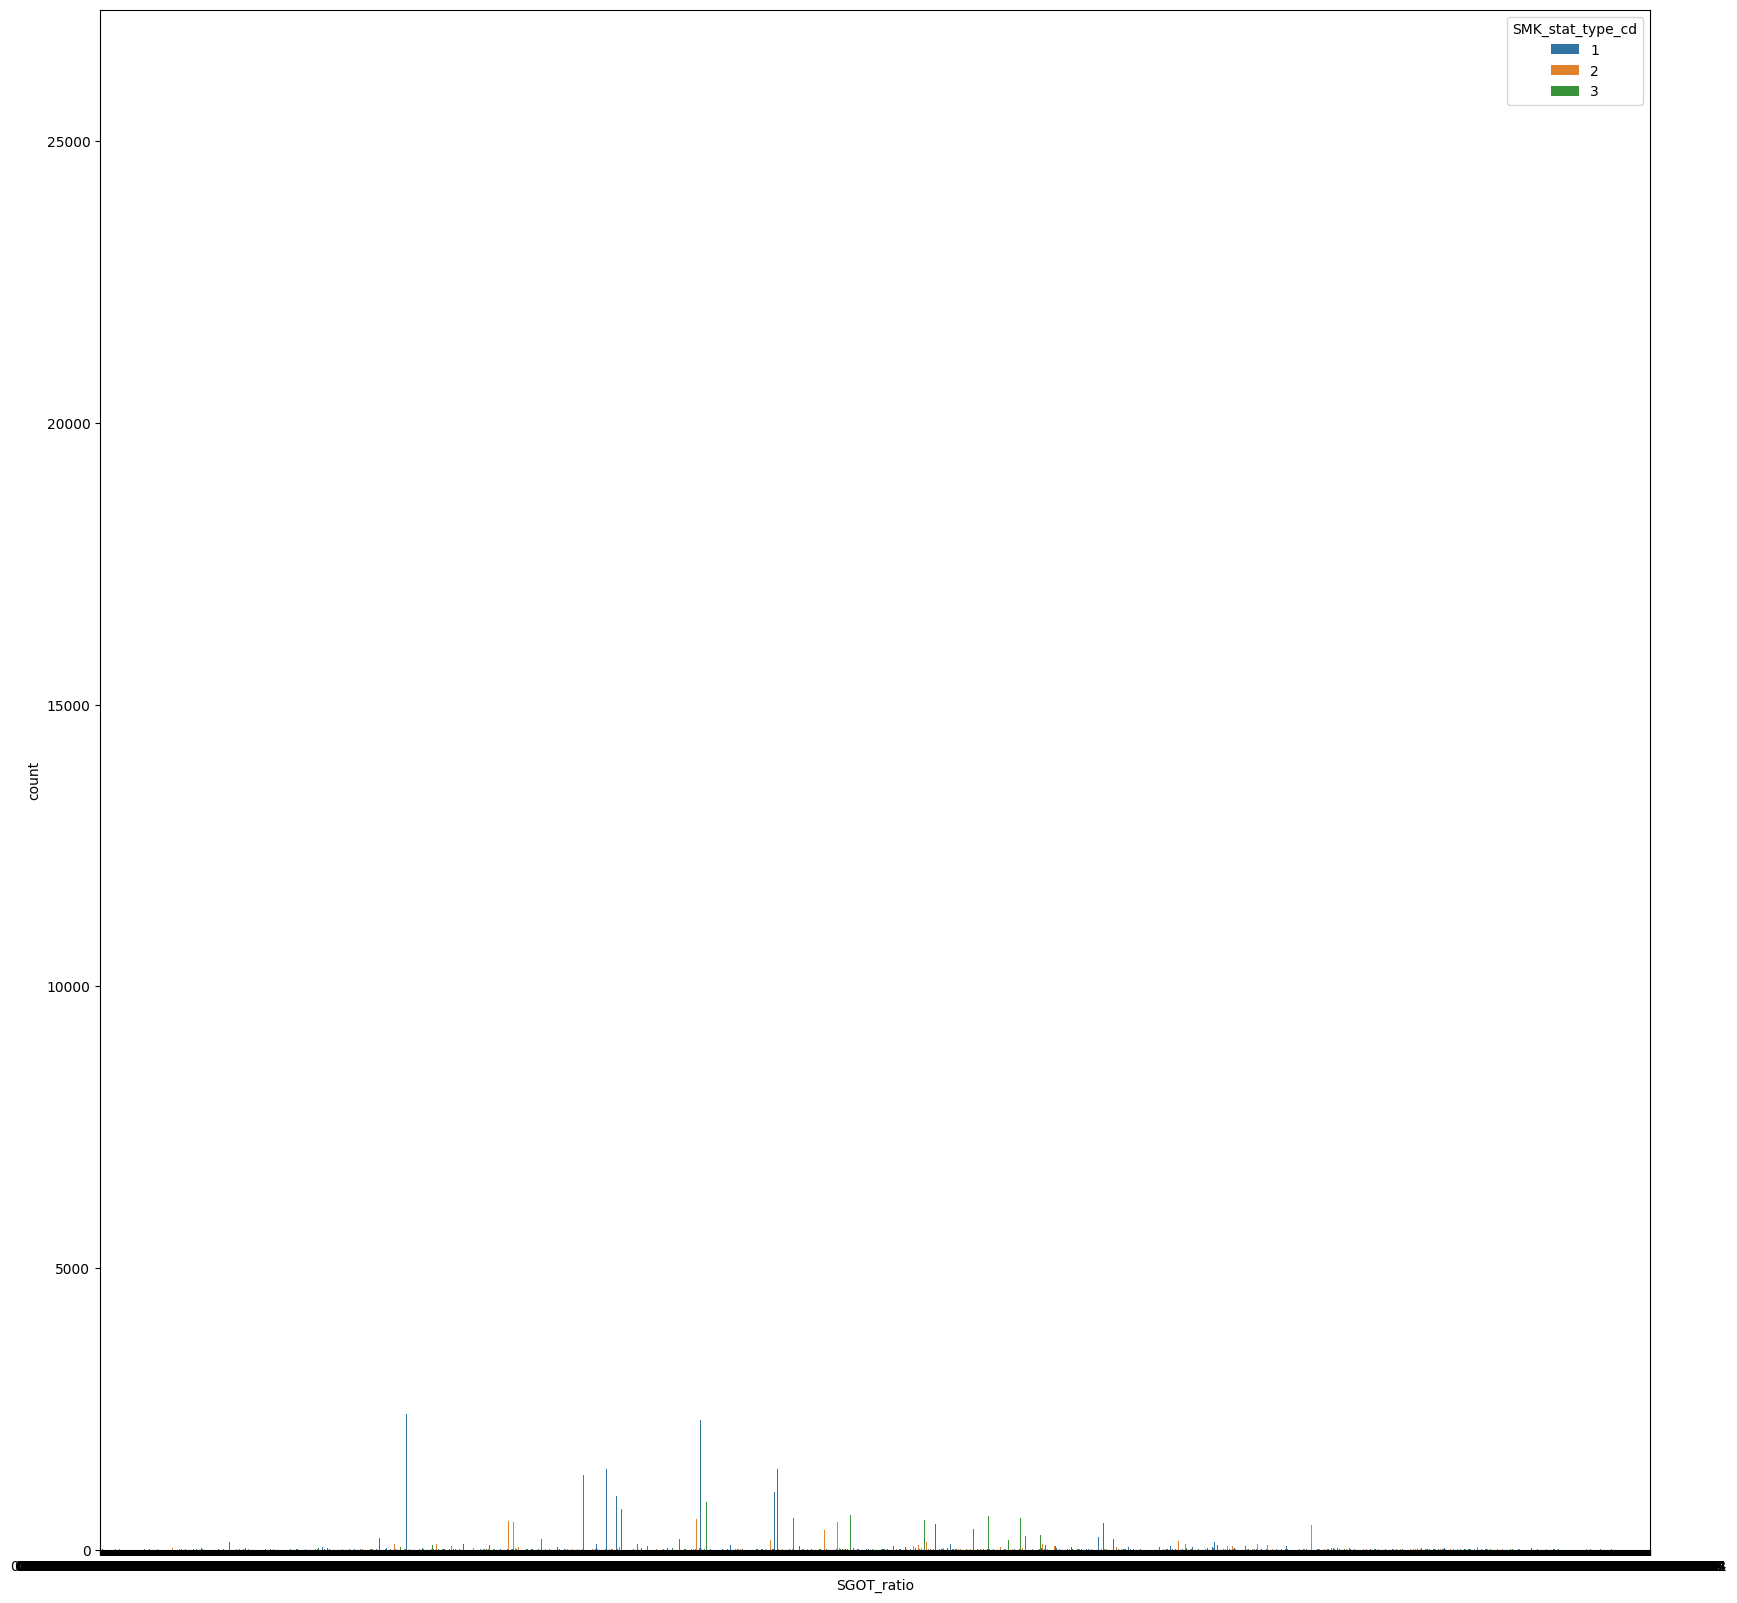

In [35]:
plt.figure(figsize=(20, 20))
sns.countplot(x='SGOT_ratio', hue='SMK_stat_type_cd', data=health)
plt.show()


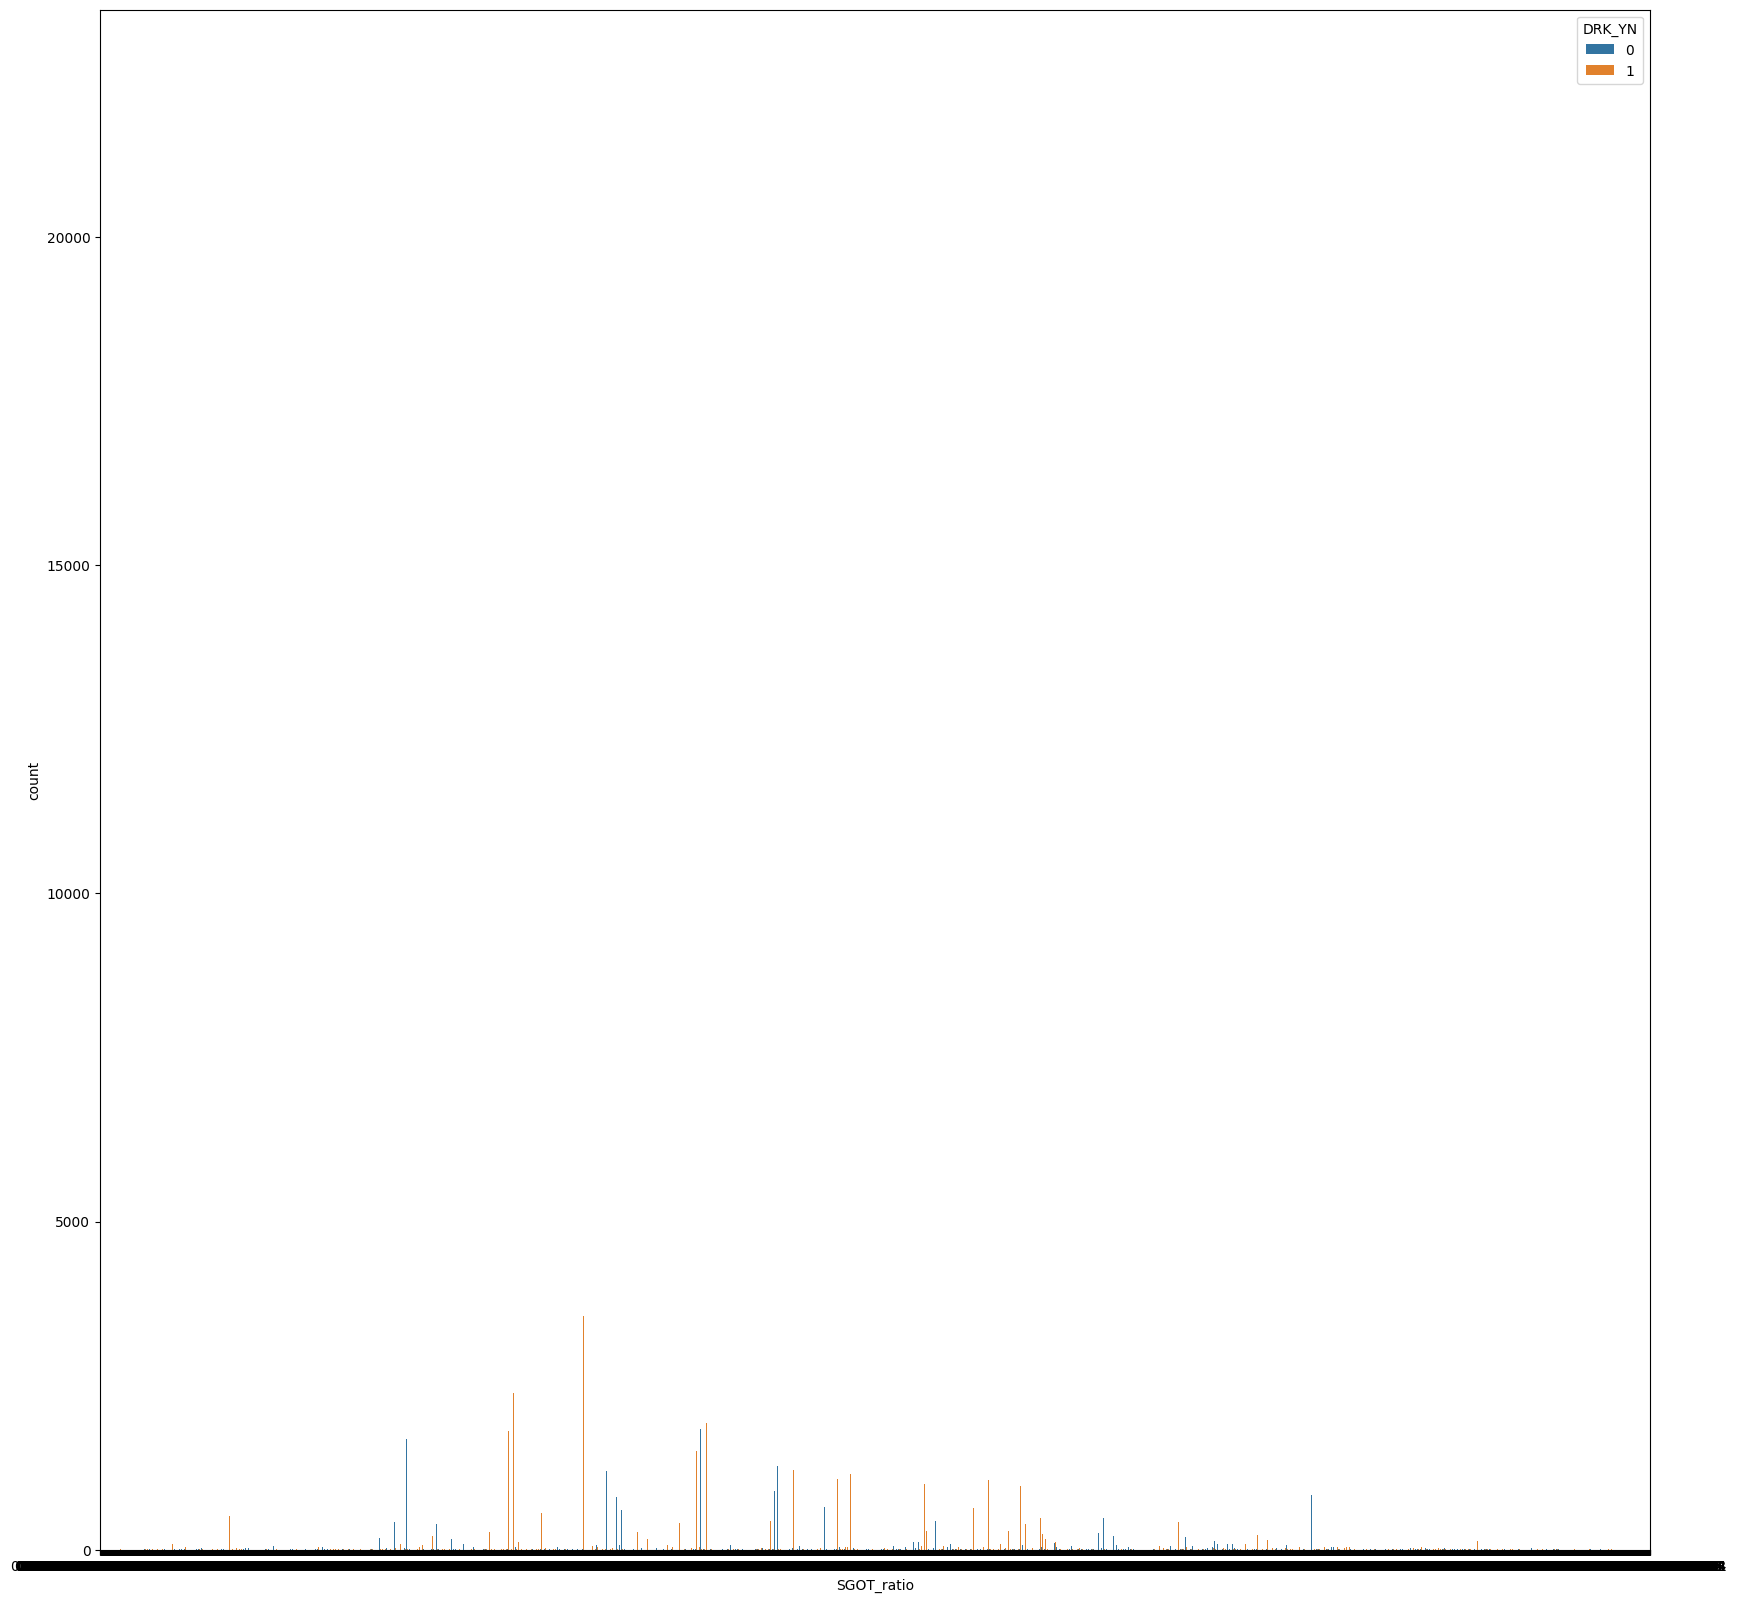

In [37]:

plt.figure(figsize=(20, 20))
sns.countplot(x='SGOT_ratio', hue='DRK_YN', data=health)
plt.show()

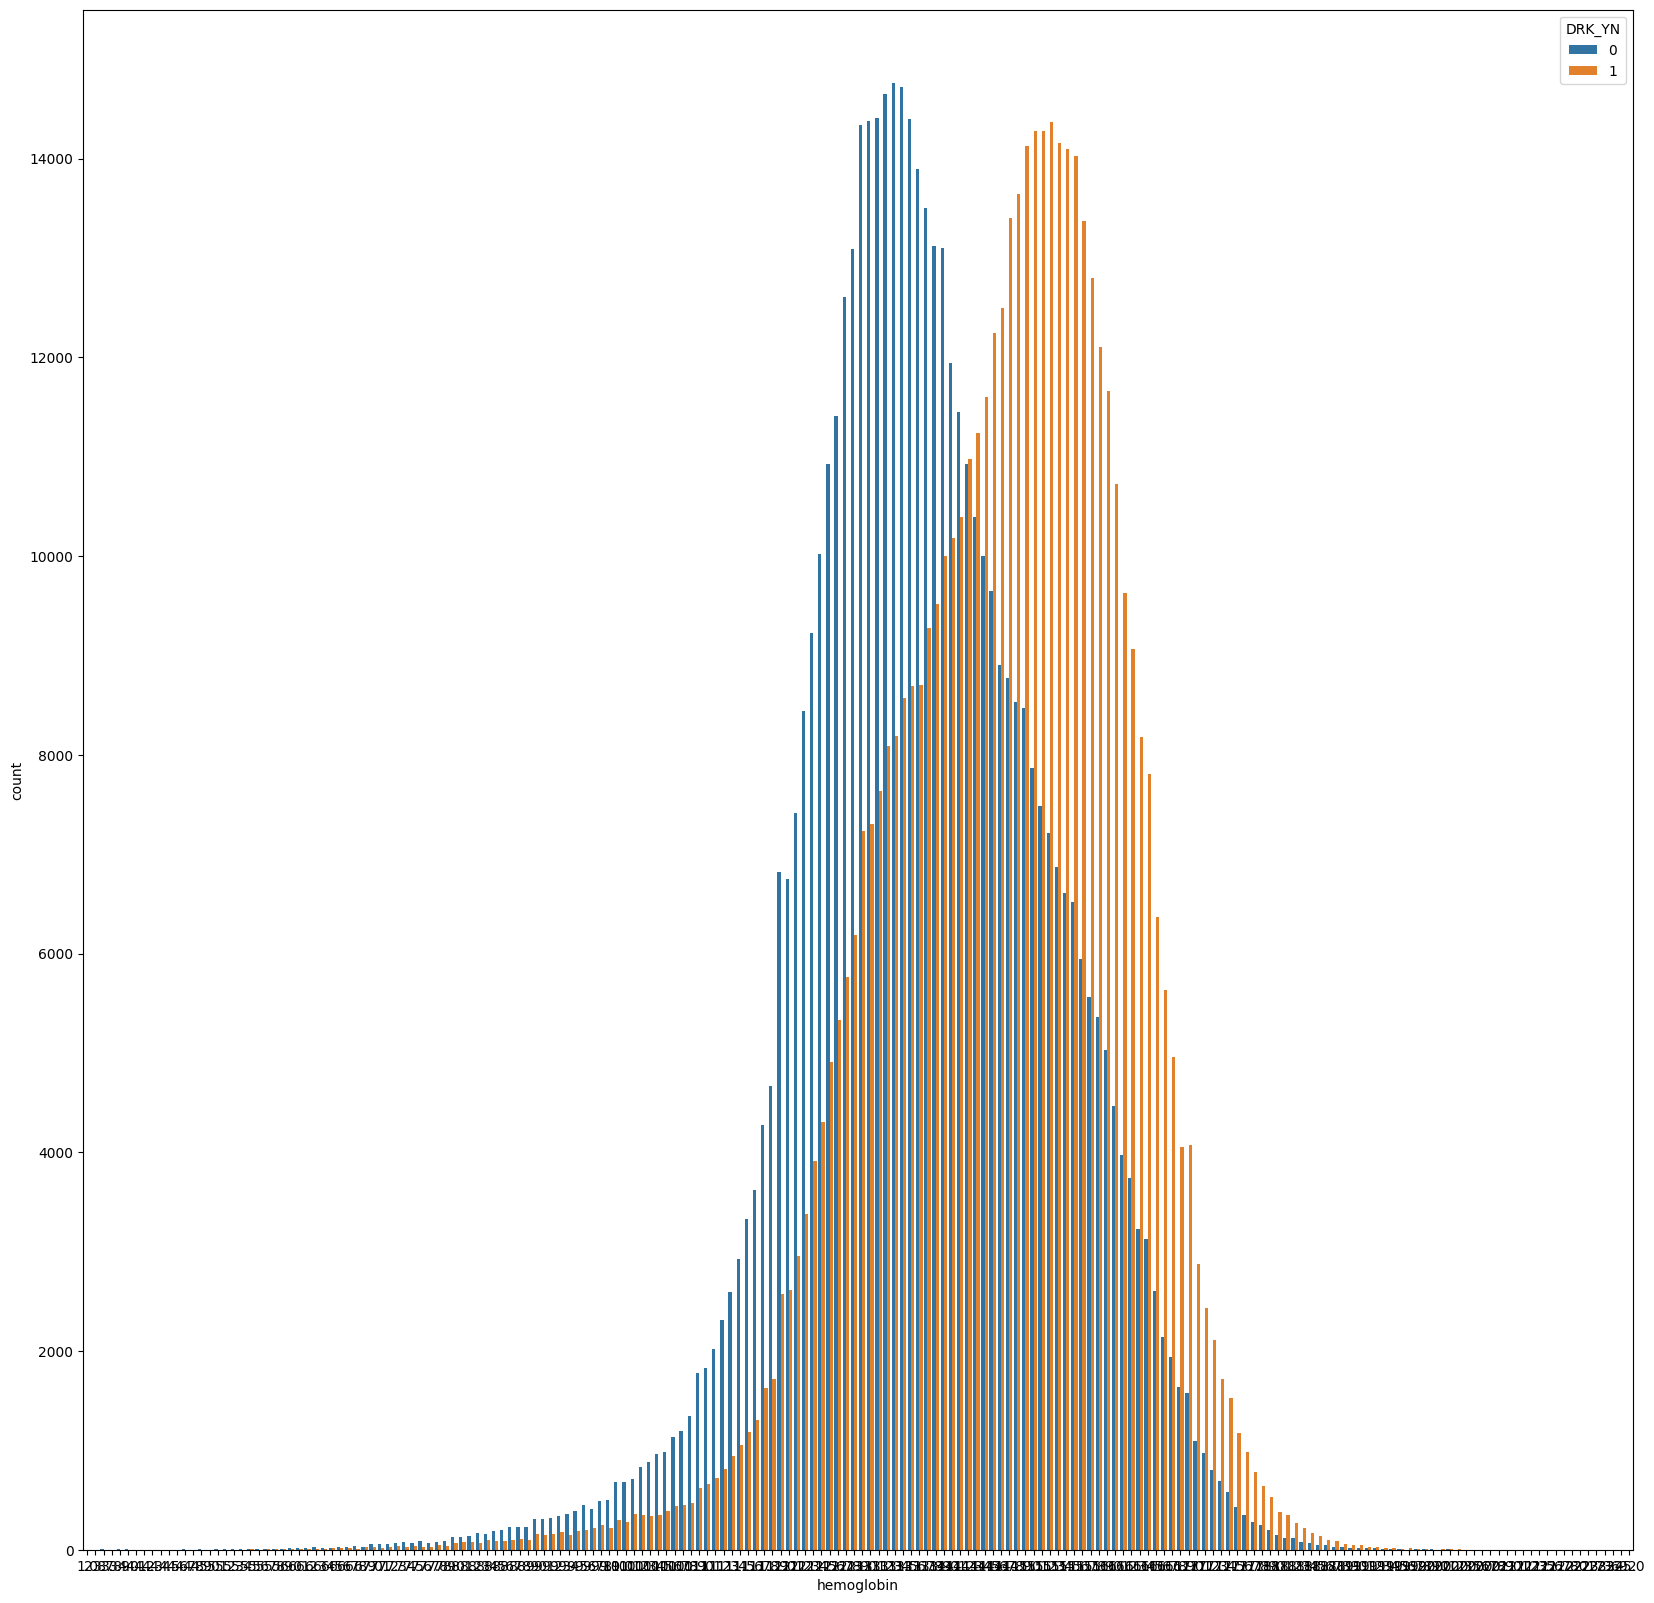

In [38]:

plt.figure(figsize=(20, 20))
sns.countplot(x='hemoglobin', hue='DRK_YN', data=health)
plt.show()

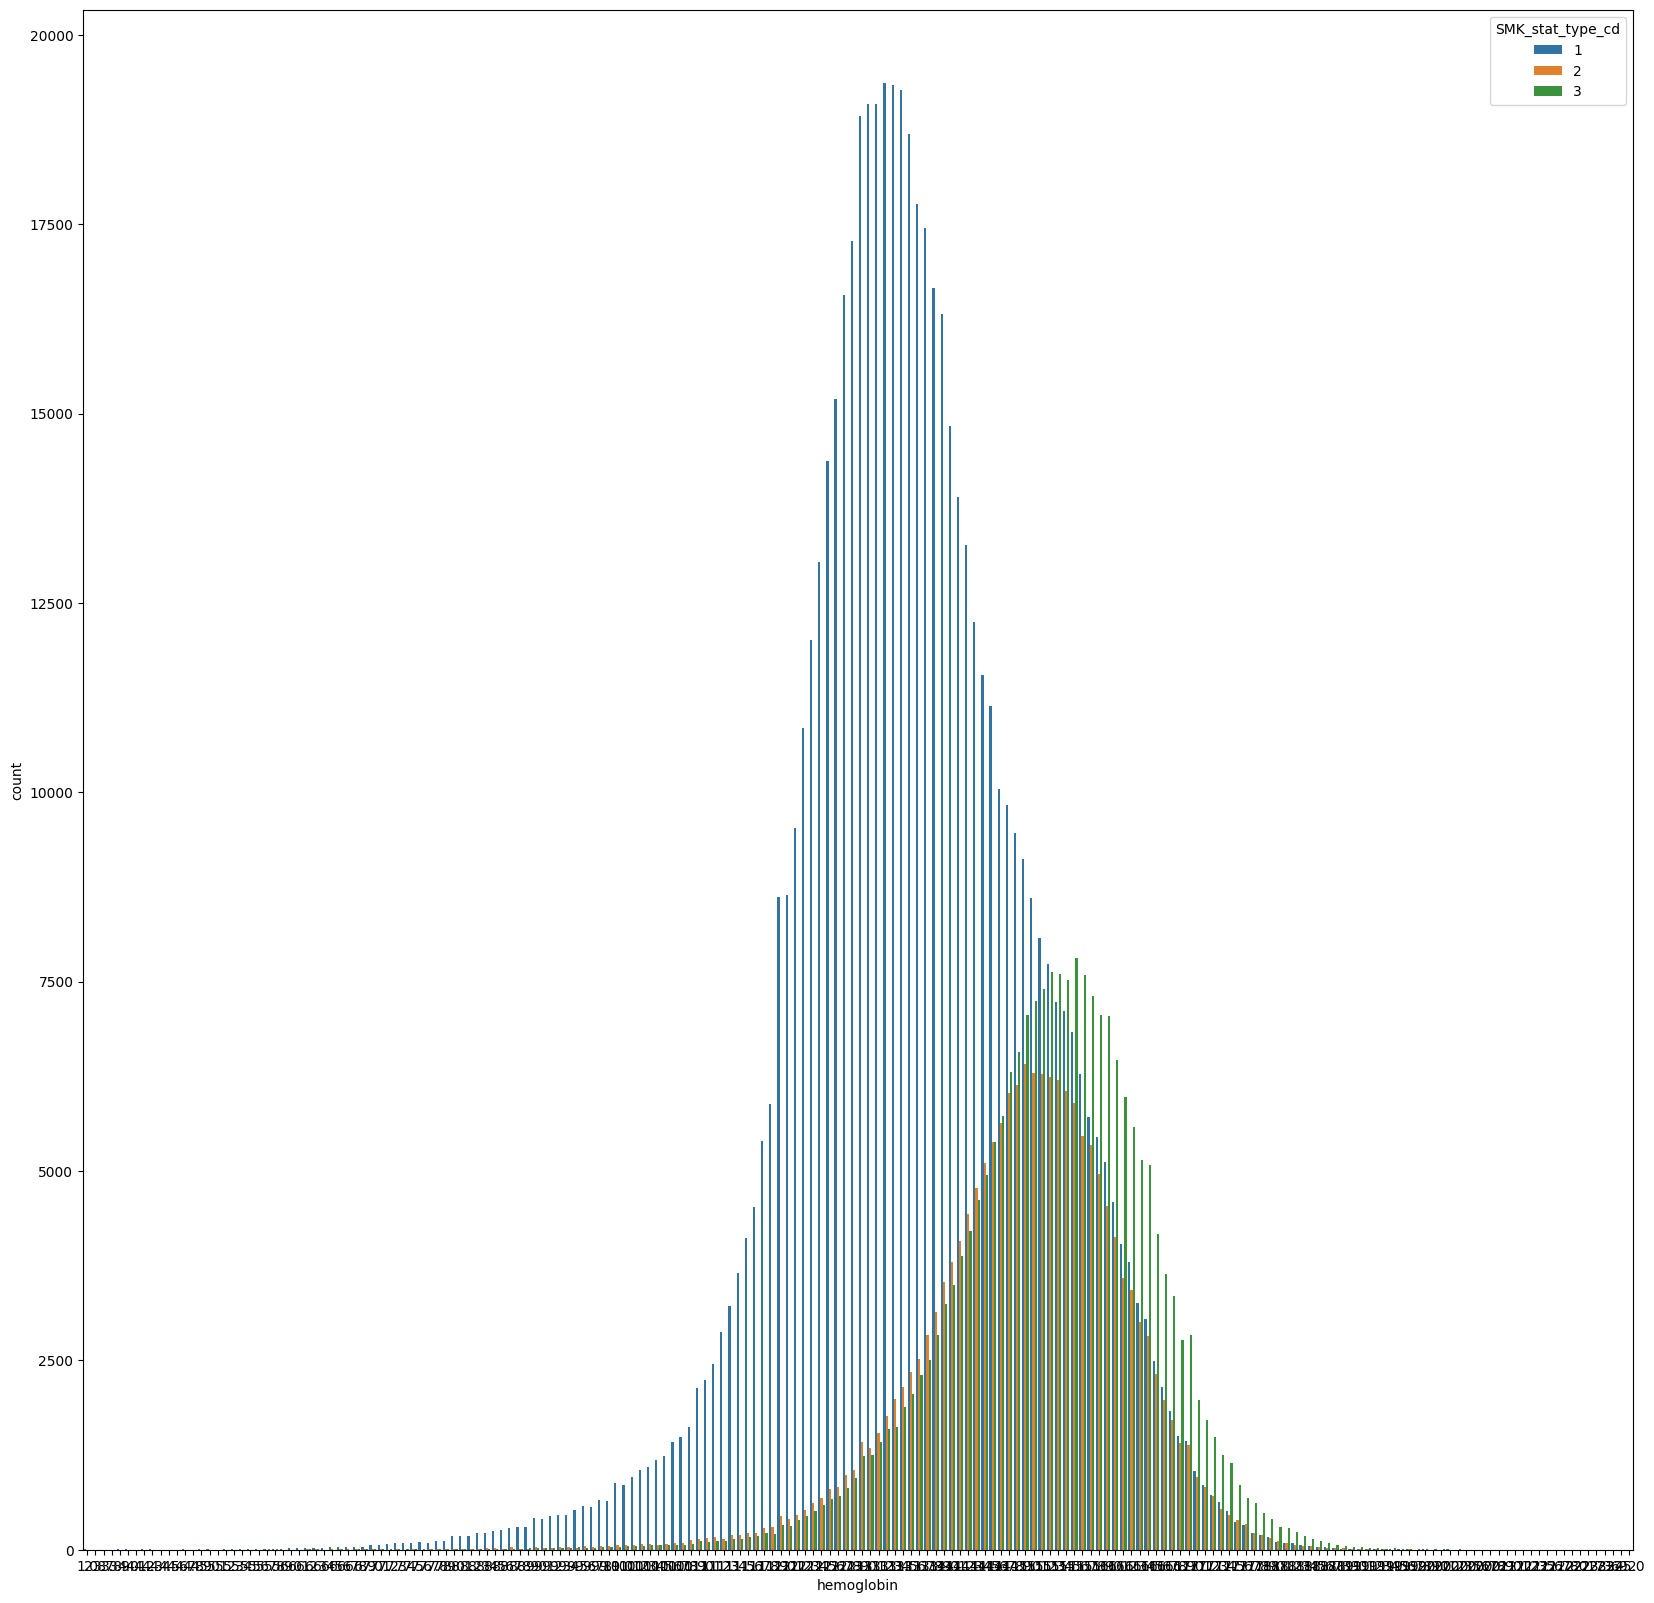

In [39]:

plt.figure(figsize=(20, 20))
sns.countplot(x='hemoglobin', hue='SMK_stat_type_cd', data=health)
plt.show()

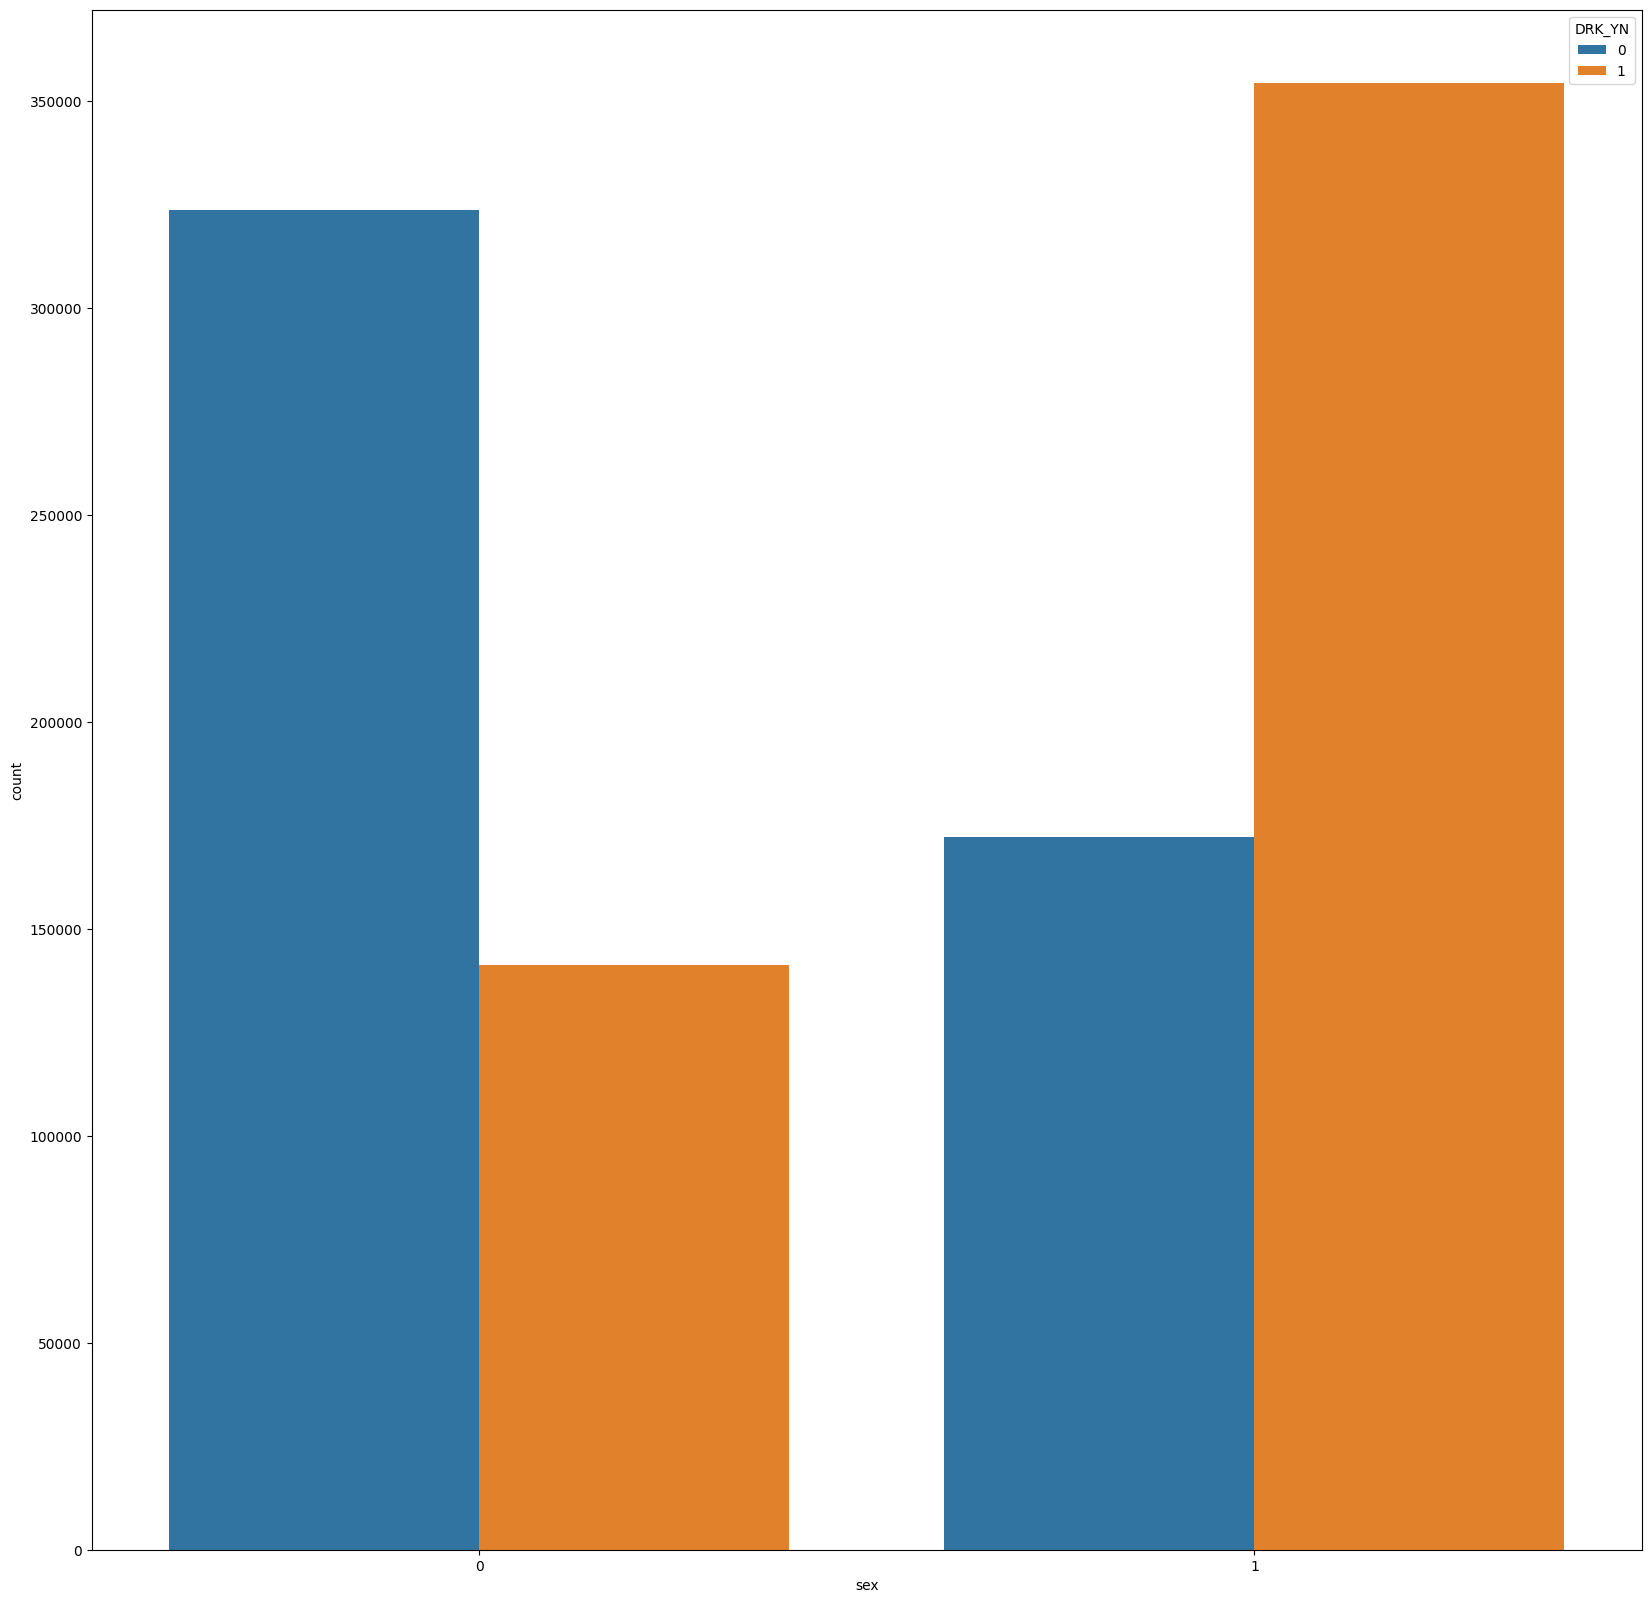

In [40]:
plt.figure(figsize=(20, 20))
sns.countplot(x='sex', hue='DRK_YN', data=health)
plt.show()

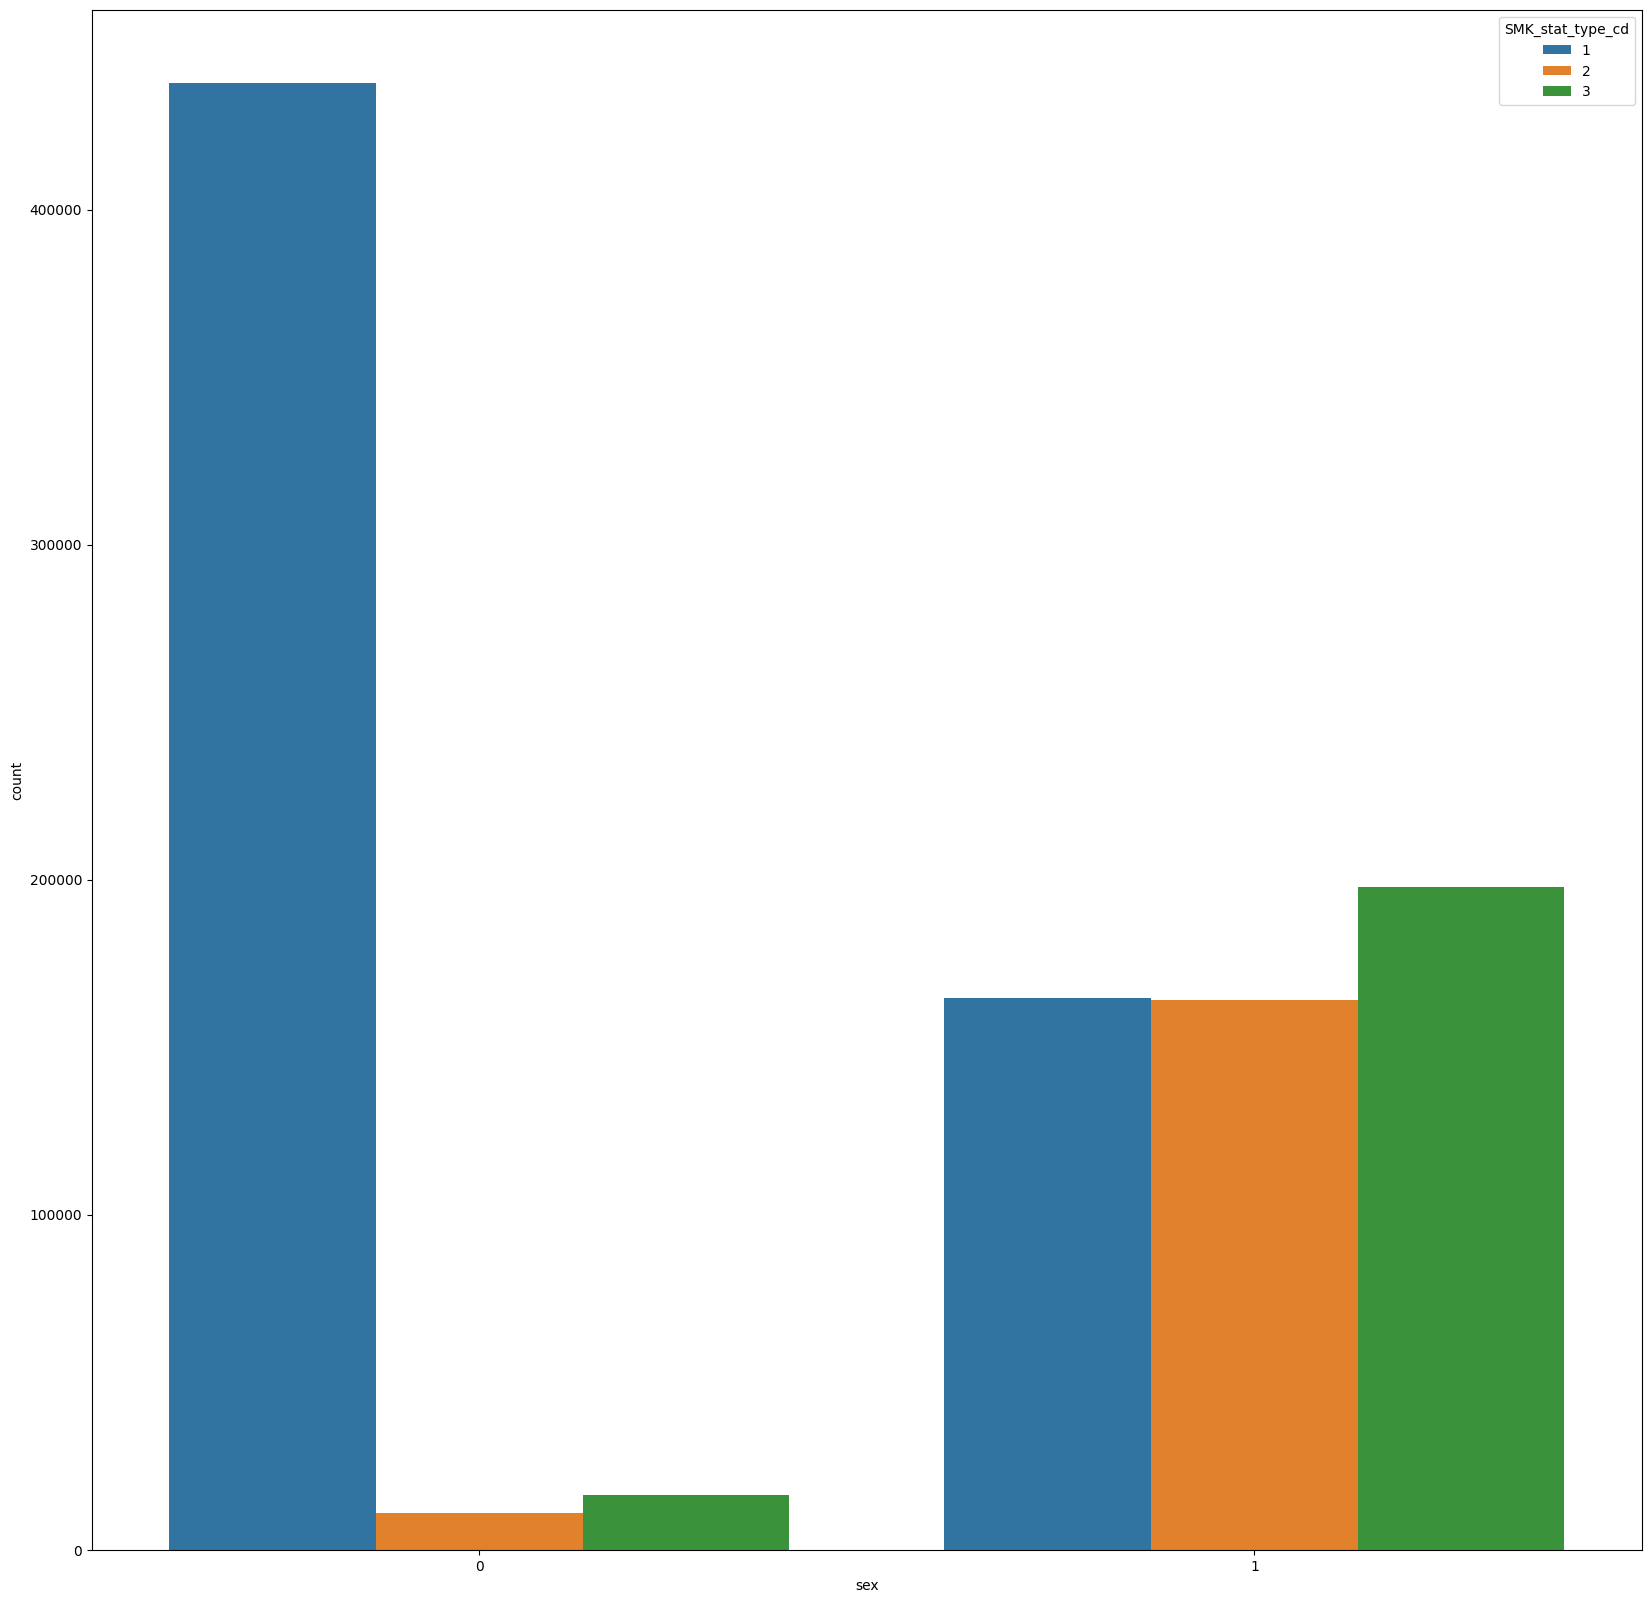

In [41]:

plt.figure(figsize=(20, 20))
sns.countplot(x='sex', hue='SMK_stat_type_cd', data=health)
plt.show()

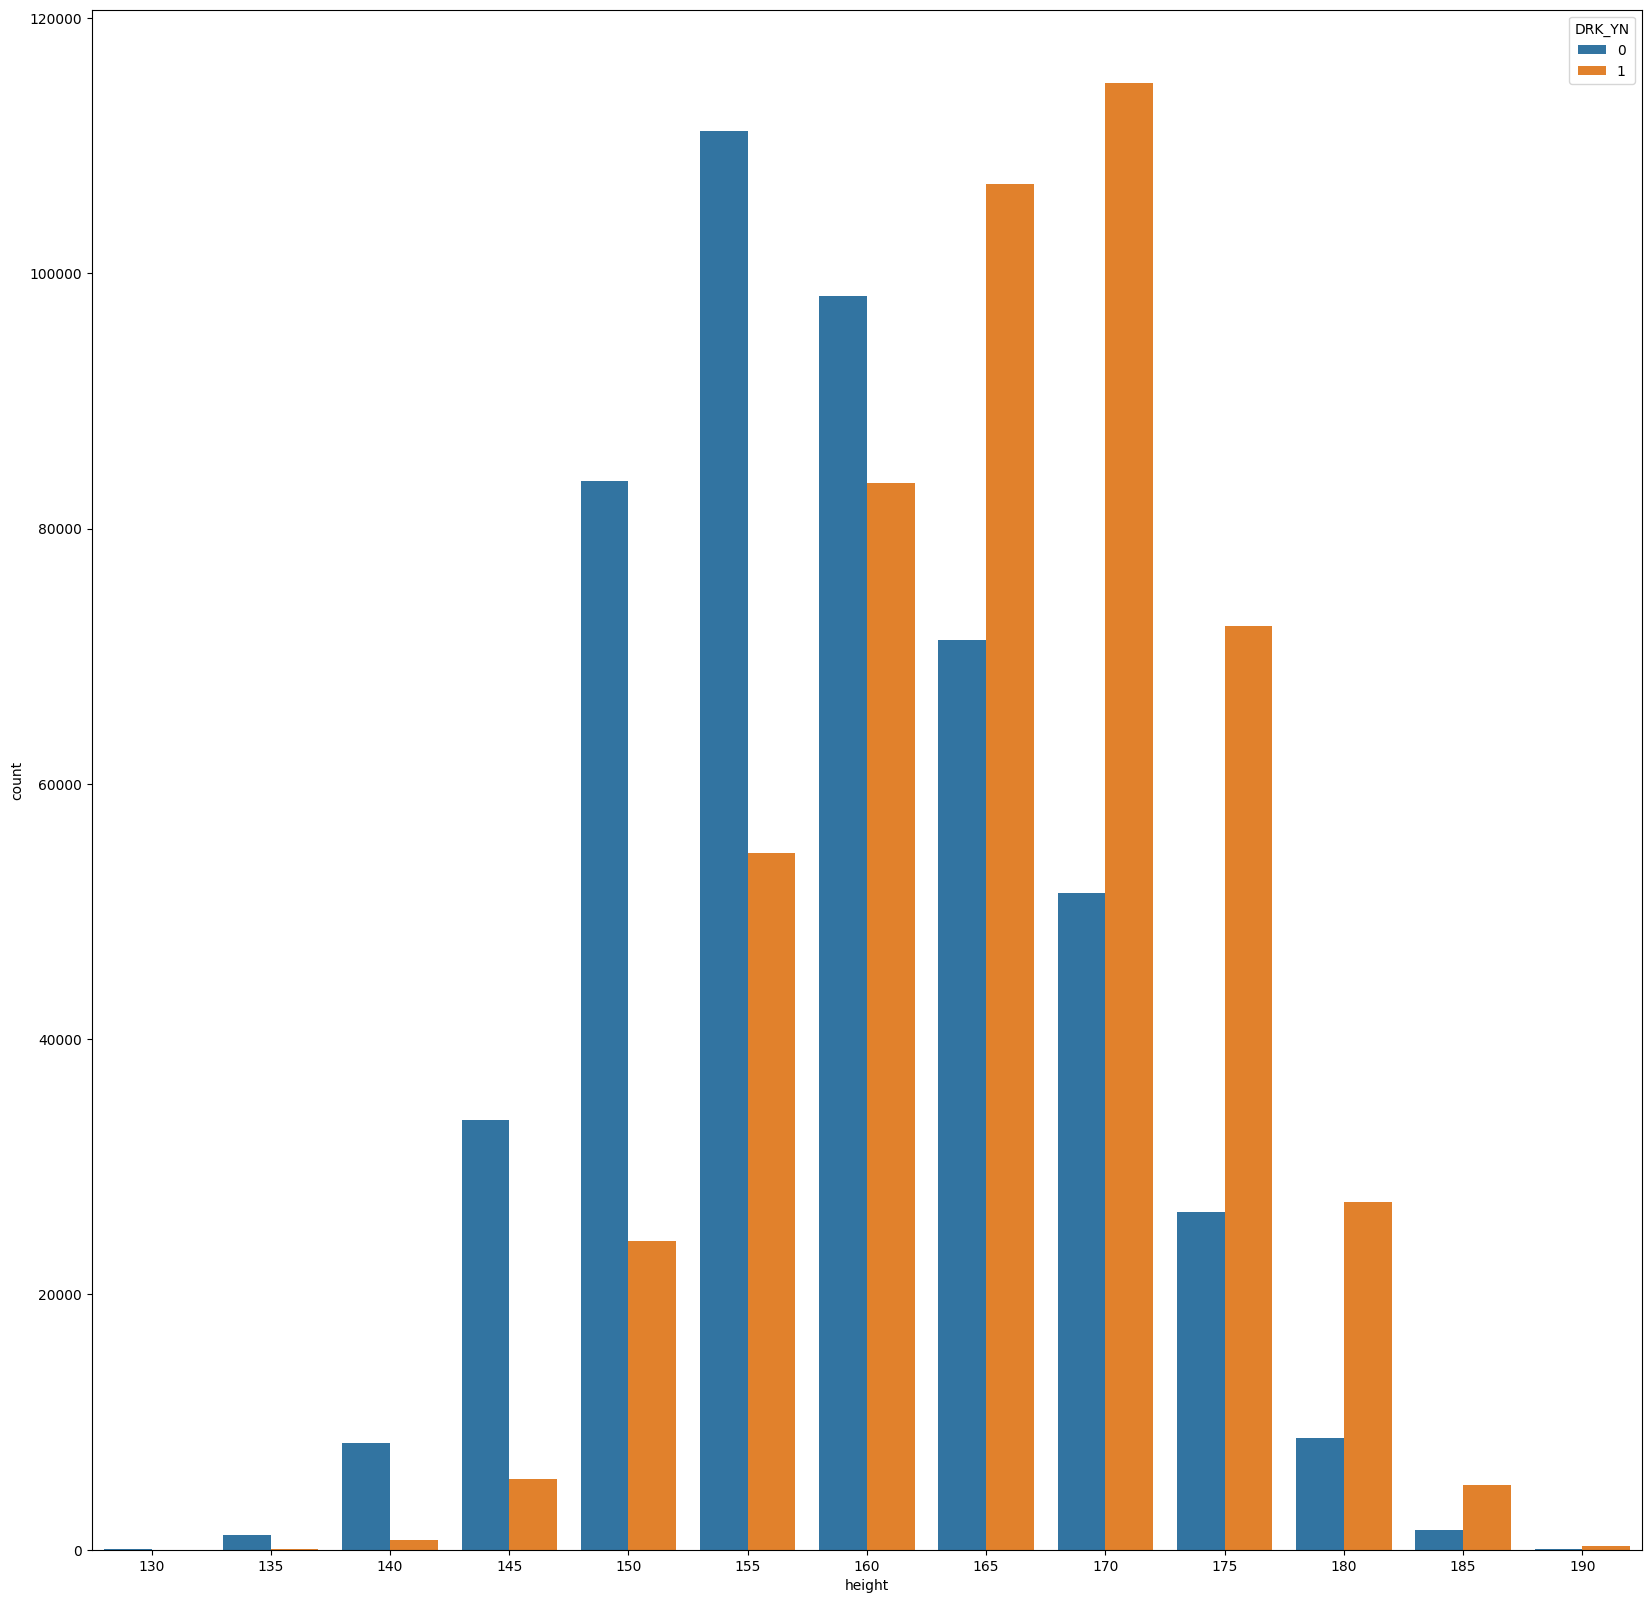

In [42]:

plt.figure(figsize=(20, 20))
sns.countplot(x='height', hue='DRK_YN', data=health)
plt.show()

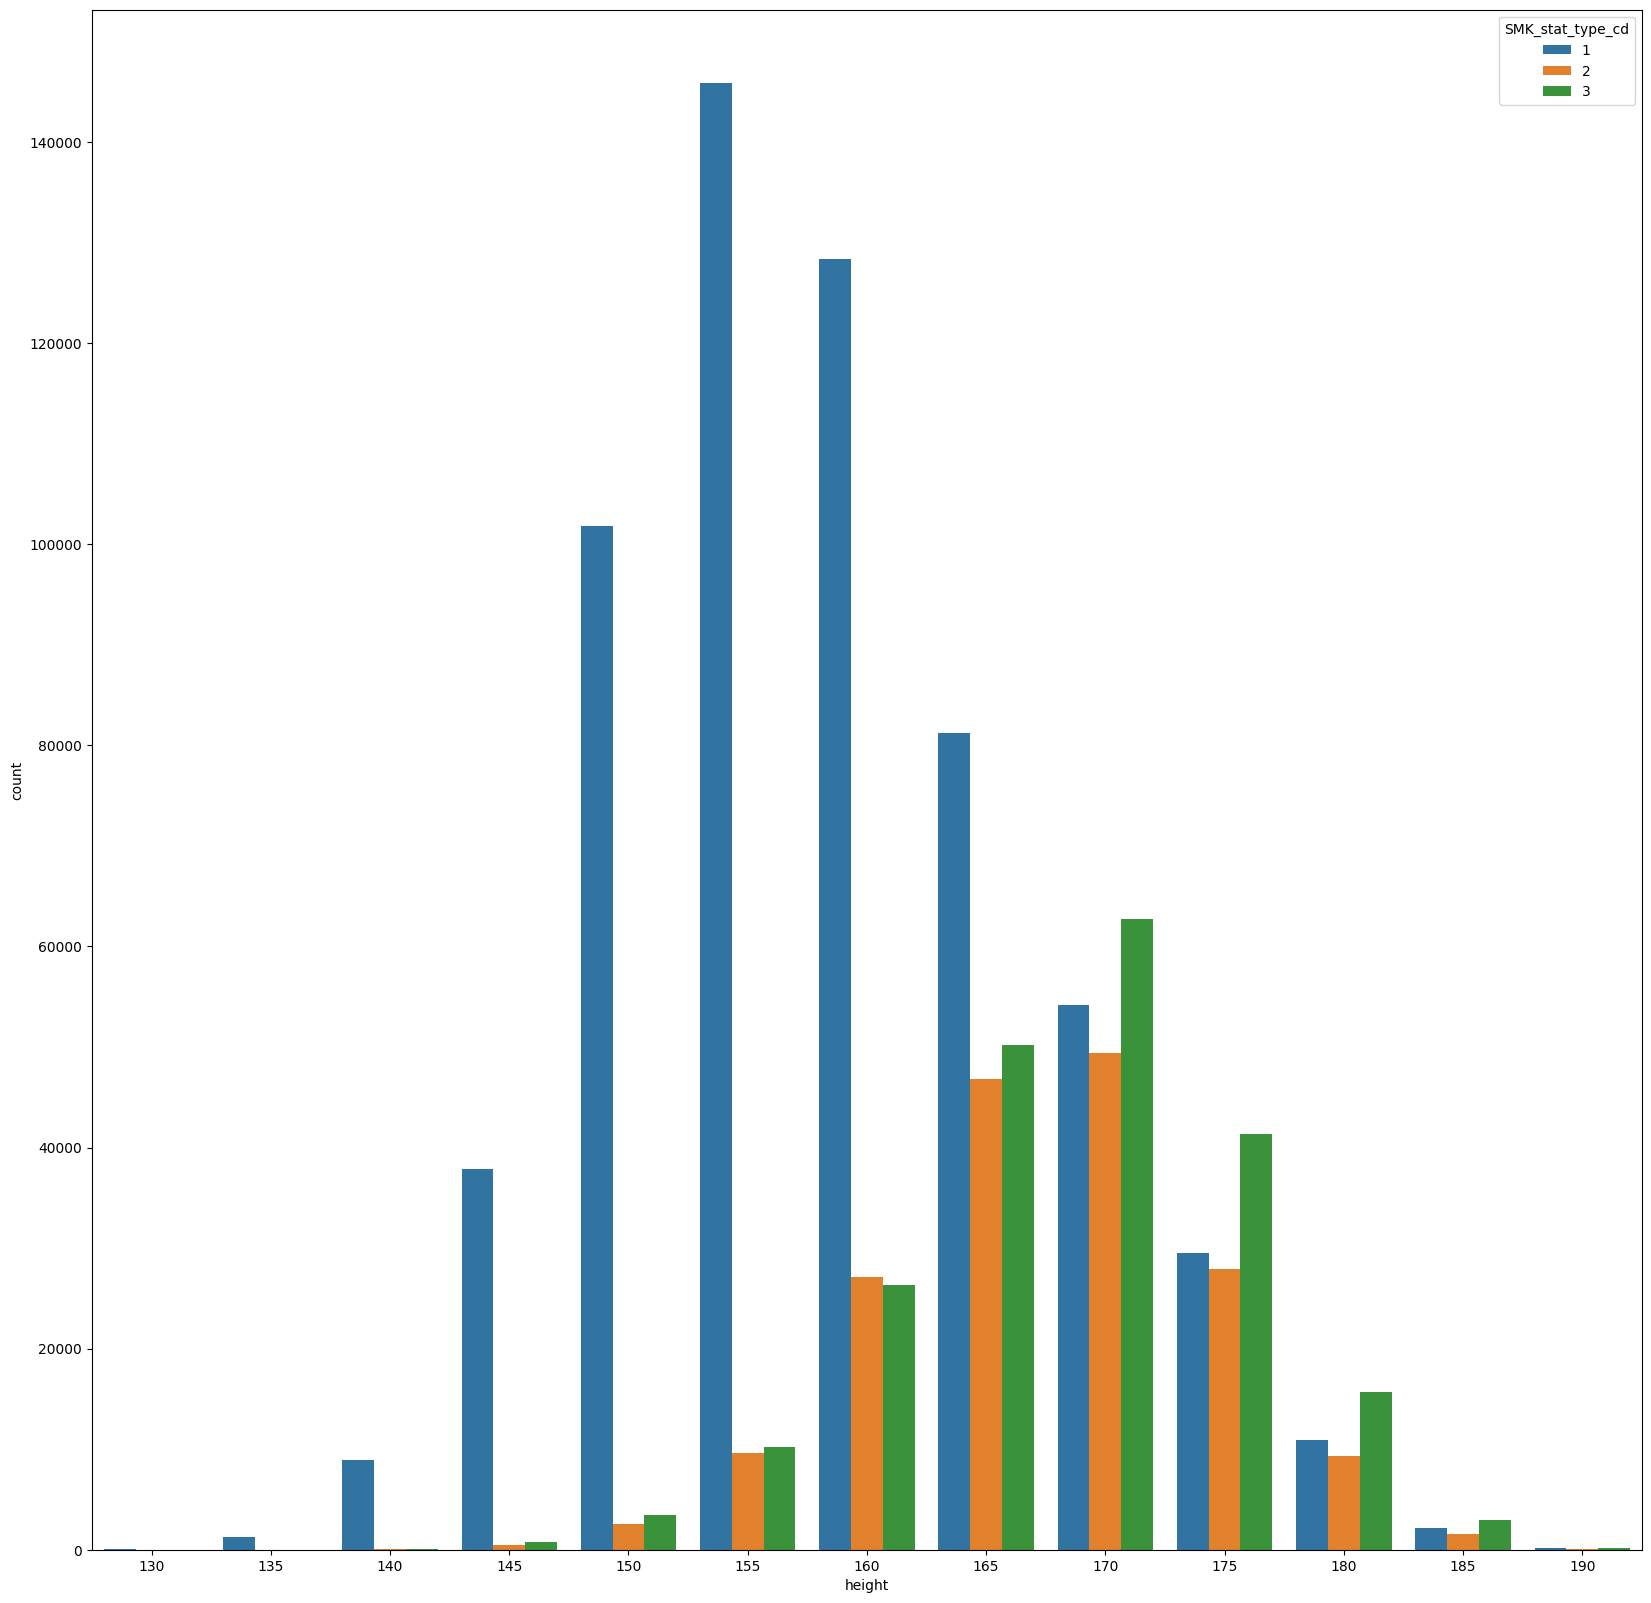

In [43]:

plt.figure(figsize=(20, 20))
sns.countplot(x='height', hue='SMK_stat_type_cd', data=health)
plt.show()

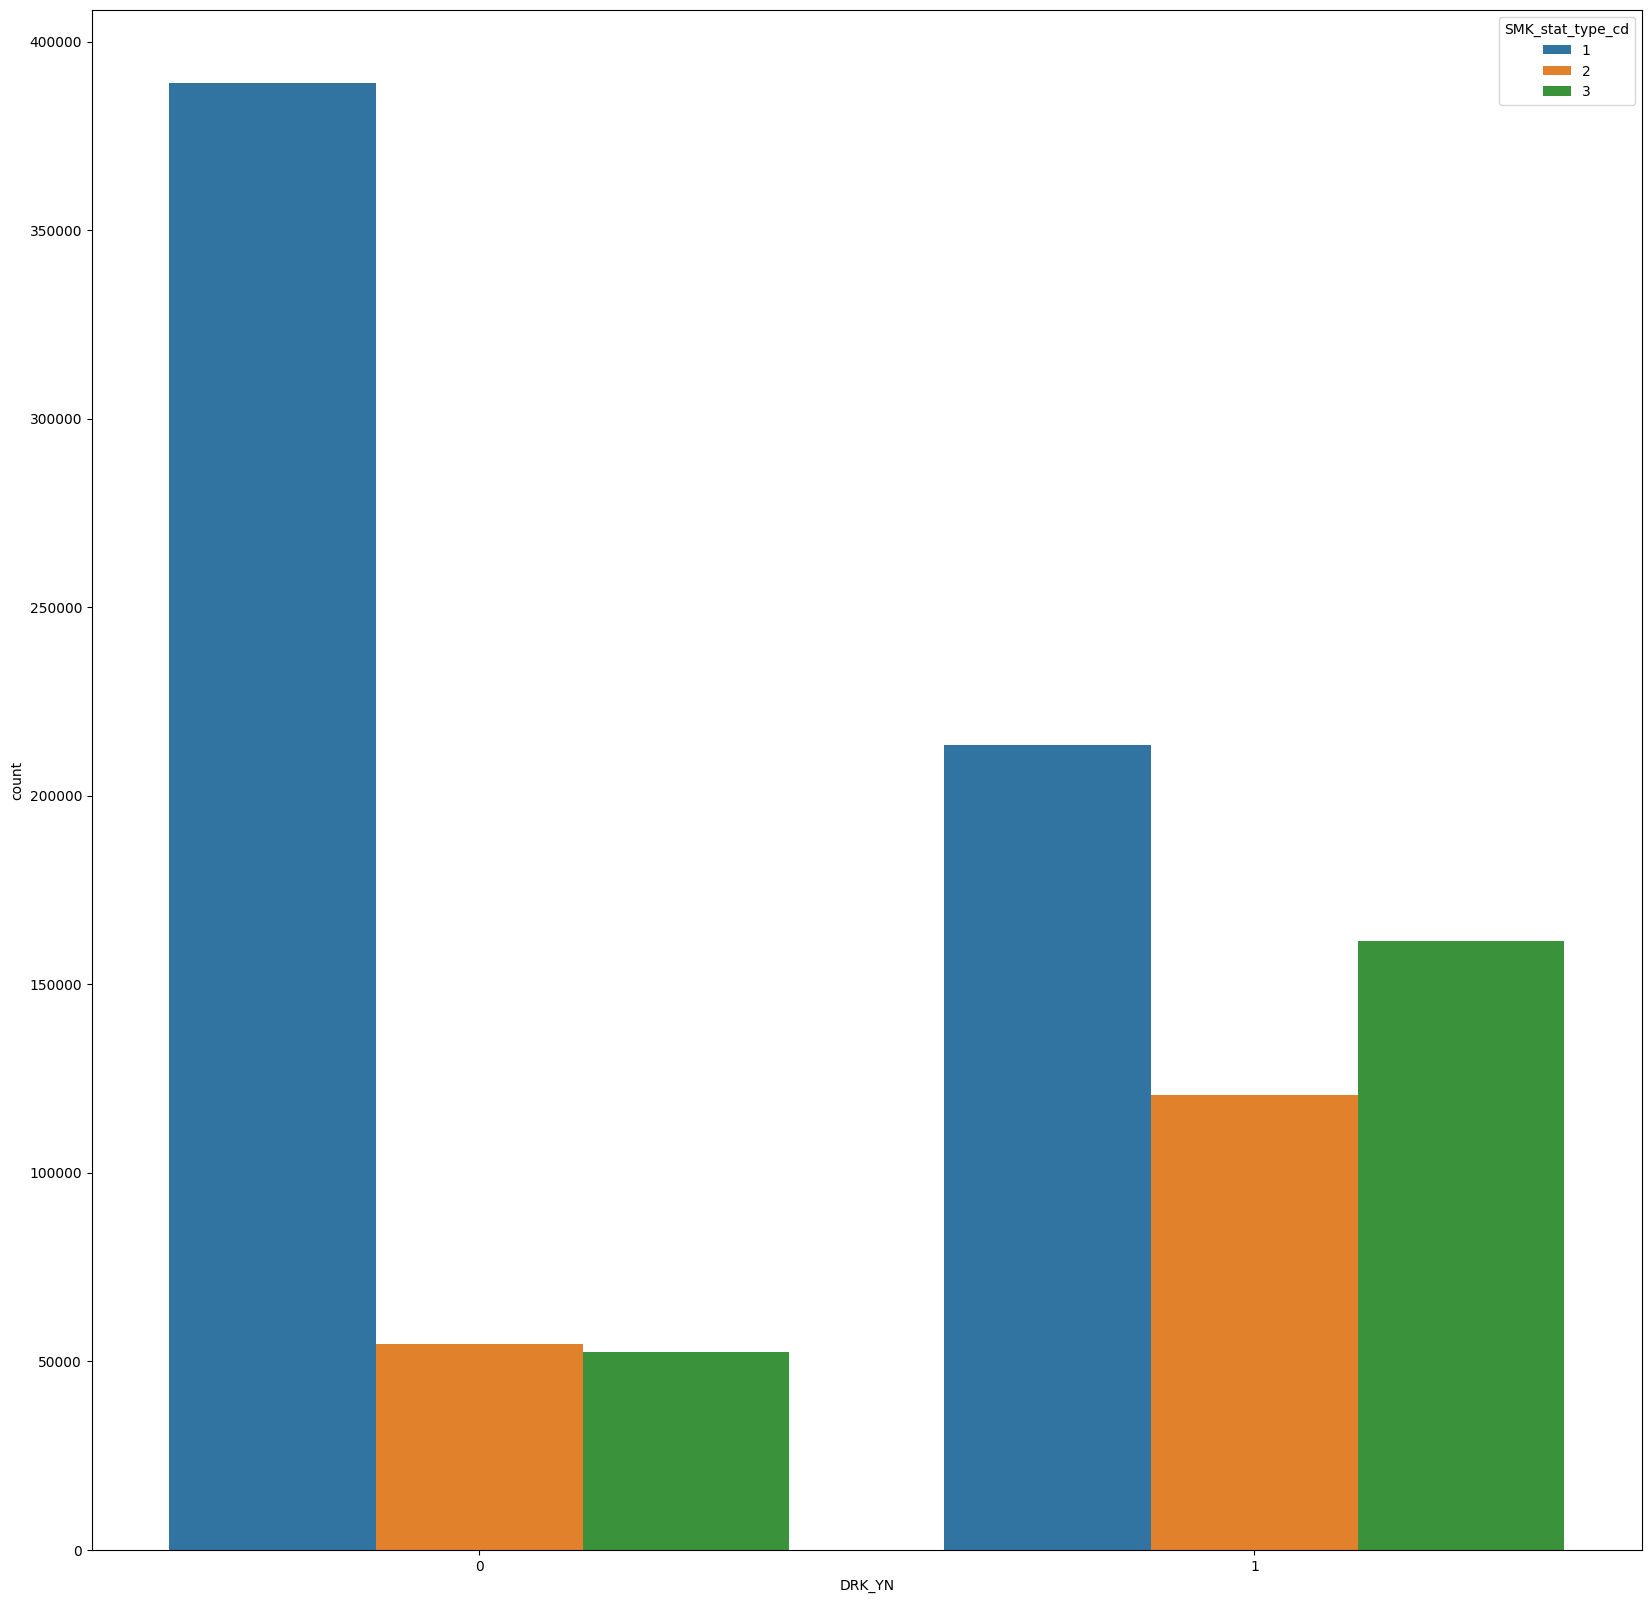

In [44]:

plt.figure(figsize=(20, 20))
sns.countplot(x='DRK_YN', hue='SMK_stat_type_cd', data=health)
plt.show()

We will now identify and remove outliers. One possible method is the IQR method where we compute the first and 3rd quartile and then find their difference - entries out of this range are considered outliers. We exclude columns that have a categorical nature. This however, is leading to severe data loss - that of almost 300000 entries. Hence, we then use the z-score method; this involves calculating the z-score of each entry and then removing entries that have a z-score greater than 3. This is a more lenient method and leads to lesser data loss. It is important to note that several attributes have a large number of outliers and removing all of them will affect model accuracy. Hence, we remove only a few of them i.e. those outside a threshold of z-score = 3.

The following box plot gives us an idea about how the data is distributed - the separated dots indicate outliers. 

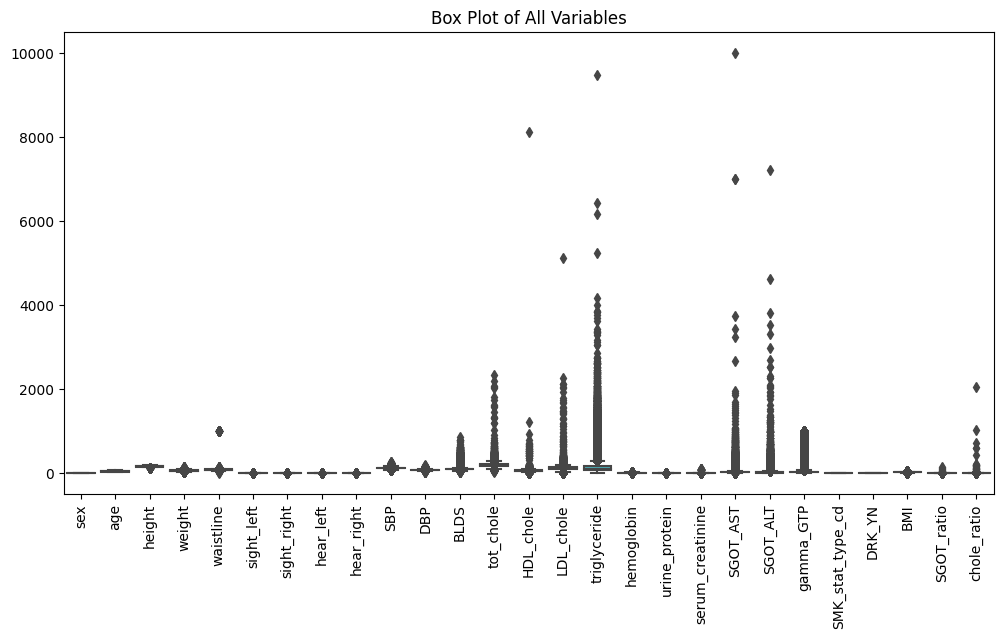

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=health, orient="v")
plt.xticks(rotation=90)
plt.title("Box Plot of All Variables")
plt.show()

In [37]:
numeric_columns = health.select_dtypes(include=[np.number])

# Calculate Z-scores for numeric variables
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# Define the threshold
threshold = 3

# Identify outliers (data points with Z-scores beyond the threshold)
outliers = (z_scores.abs() > threshold).any(axis=1)

# Remove outliers from the DataFrame
cleaned_df = health[~outliers]


In [38]:
print(cleaned_df.info())
print(cleaned_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840109 entries, 0 to 991345
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               840109 non-null  uint8  
 1   age               840109 non-null  int64  
 2   height            840109 non-null  int64  
 3   weight            840109 non-null  int64  
 4   waistline         840109 non-null  float64
 5   sight_left        840109 non-null  float64
 6   sight_right       840109 non-null  float64
 7   hear_left         840109 non-null  int64  
 8   hear_right        840109 non-null  int64  
 9   SBP               840109 non-null  int64  
 10  DBP               840109 non-null  int64  
 11  BLDS              840109 non-null  int64  
 12  tot_chole         840109 non-null  int64  
 13  HDL_chole         840109 non-null  int64  
 14  LDL_chole         840109 non-null  int64  
 15  triglyceride      840109 non-null  int64  
 16  hemoglobin        84

We now need to scale the data - converting all our numerical attributes so that they fall in a fixed range. Otherwise attributes with larger scales might dominate the ones with smaller scales.

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df)


In [40]:
new_data = pd.DataFrame(scaled_data, columns=cleaned_df.columns)

In [41]:
health = new_data

In [42]:
from sklearn.model_selection import train_test_split

X = new_data.drop('DRK_YN', axis=1)
y = new_data['DRK_YN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Visualisation and pre processing are now complete. We will now proceed to implement some common ML models.

First we will perform predictions for the DRK_YN problem. We will use the following models:

1. Logistic Regression
2. K Nearest Neighbours
3. SGD Classifier

We will use the following metrics to evaluate our models:

1. Accuracy Score - the number of correct predictions divided by the total number of predictions; it gives us an overall idea about the model's performance
2. Precision Score - the number of true positives divided by the number of true positives and false positives; it measure show many of the positive predictions were actually correct
3. Recall Score - the number of true positives divided by the number of true positives and false negatives; it gives us an idea about the model's ability to correctly predict positive values
4. F1 Score - the harmonic mean of precision and recall; it gives us an idea about the model's ability to correctly predict positive values and ensuring they are correct. It is like a single metric to judge both precision and recall.
5. The presicion recall curve - it gives us an idea about the tradeoff between precision and recall for different thresholds. It is a good metric to use when the data is imbalanced i.e. there are more negative cases than positive
6. ROC Curve - receiver operating characteristic curve. It is a plot of the true positive rate against the false positive rate for different thresholds. It is a good metric to use when the data is balanced i.e. there are equal number of positive and negative cases. For this reason we will consider the ROC curve as a more important metric than the precision recall curve for out dataset. The central diagnol of an ROC curve represents a random classifier. The closer the curve is to the top left corner, the better the model is.
7. ROC AUC - area under the ROC curve. The minimum value is 0.5 (corresponding to central diagnol) and the maximum value is 1 (corresponding to top left corner). The higher the value, the better the model is.
8. Confusion Matrix - They are of the form [[True Positive, False Posotve], [False Negative, True Negative]]. The columns represent predicted classes and rows represent actual classes.

In [43]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.axvspan(0,0 , color='red', alpha=0.5)
    plt.legend(["precision", "recall"], loc=0, frameon=True)
    plt.xlabel('x-axis', fontsize=20)
    plt.ylabel('y-axis', fontsize=20)
    plt.grid()

In [44]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('x-axis', fontsize=20)
    plt.ylabel('y-axis', fontsize=20)
    plt.grid()
    

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

def metrics(y_pred):
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

    # Print the model's performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix: \n{confusion}")
    print(f"ROC AUC: {roc:.2f}")
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plot_roc_curve(fpr, tpr)
    plt.show()

Cross-Validation Scores: [0.72364564 0.72226934 0.72491575 0.72211104 0.72435778]
Accuracy: 0.7234
Precision: 0.73
Recall: 0.71
F1 Score: 0.72
Confusion Matrix: 
[[62168 22167]
 [24304 59383]]
ROC AUC: 0.72


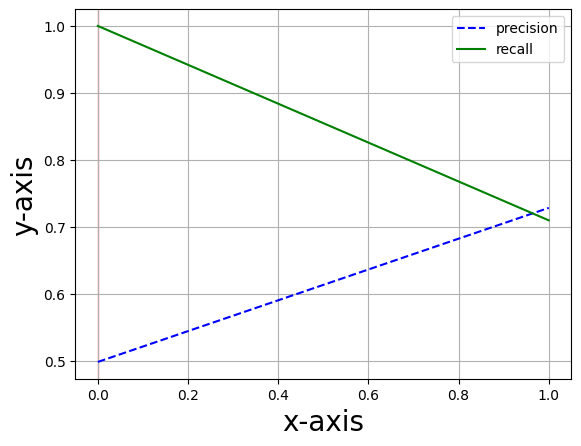

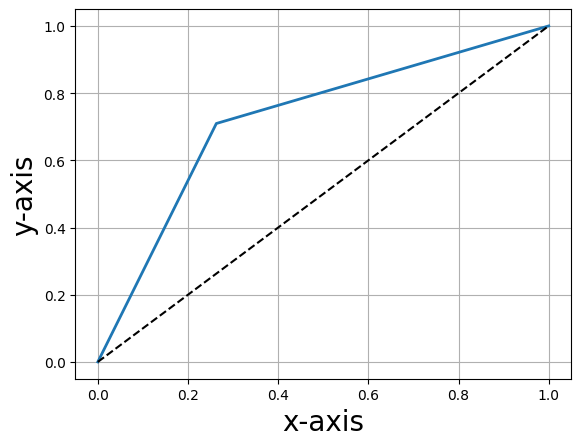

Time taken: 53.32 seconds
Maximum Memory Usage: 2359.87 MiB


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def log_reg():
    # Create a Logistic Regression model
    model = LogisticRegression(max_iter = 1000)

    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Fit the model to your data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    print("Cross-Validation Scores:", scores)
    metrics(y_pred)

if __name__ == "__main__":
    start_time = time.time()
    mem_usage = memory_usage((log_reg, (), {}))
    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")


Cross-Validation Scores: [0.68707316 0.68577869 0.6859549  0.68517375 0.68554573]
Accuracy: 0.6876
Precision: 0.68
Recall: 0.70
F1 Score: 0.69
Confusion Matrix: 
[[56961 27374]
 [25110 58577]]
ROC AUC: 0.69


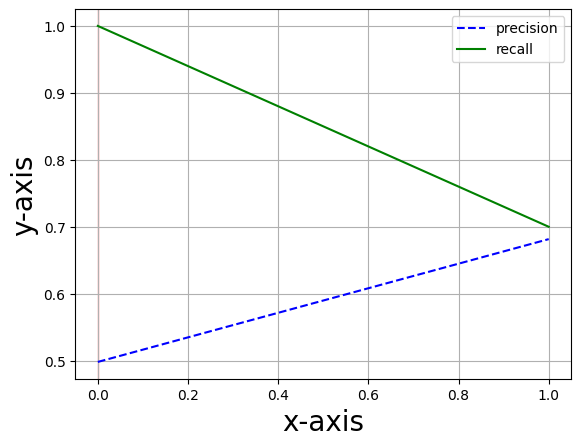

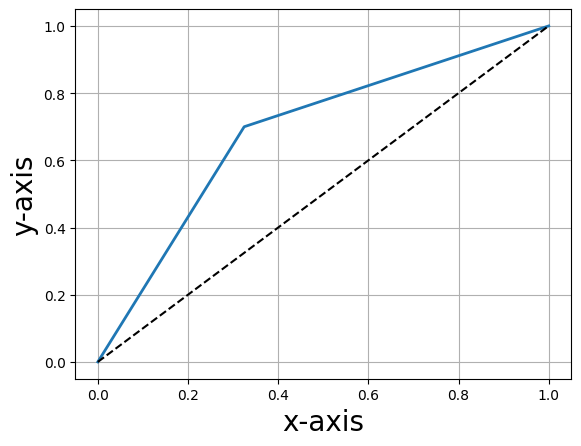

Time taken: 441.40 seconds
Maximum Memory Usage: 2053.53 MiB


In [49]:
from sklearn.neighbors import KNeighborsClassifier

def knn():

    model = KNeighborsClassifier()

    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Fit the model to your data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    print("Cross-Validation Scores:", scores)
    metrics(y_pred)

if __name__ == "__main__":
    start_time = time.time()
    mem_usage = memory_usage((knn, (), {}))
    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

Cross-Validation Scores: [0.71862399 0.71820738 0.72065289 0.72027348 0.72092072]
Accuracy: 0.7203
Precision: 0.71
Recall: 0.74
F1 Score: 0.72
Confusion Matrix: 
[[59176 25159]
 [21836 61851]]
ROC AUC: 0.72


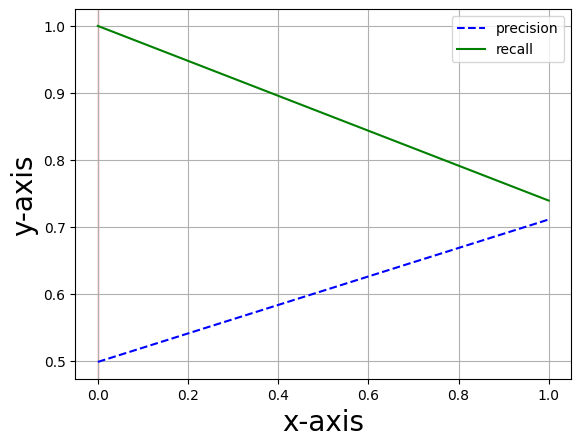

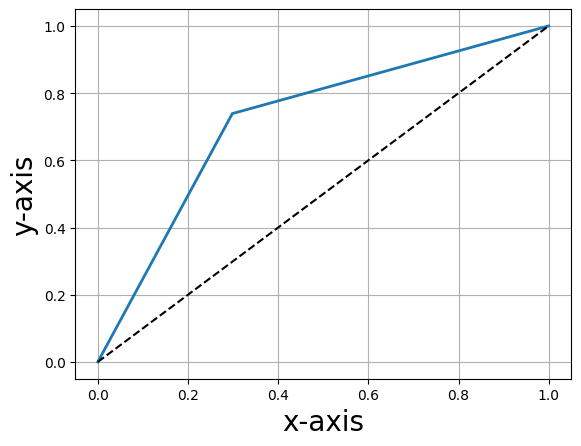

Time taken: 13.91 seconds
Maximum Memory Usage: 1888.51 MiB


In [48]:
from sklearn.linear_model import SGDClassifier

def sgd():
    # Create a SGD model
    model = SGDClassifier(max_iter = 1000)

    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Fit the model to your data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    print("Cross-Validation Scores:", scores)
    metrics(y_pred)

if __name__ == "__main__":
    start_time = time.time()
    mem_usage = memory_usage((sgd, (), {}))
    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

First of all we take a brief look at all the models we have used :

1. Logistic Regression - In this model, for a given row of data it dot products a vector of input and a vector of weights, add a vector of biases and then apply a sigmoid function to get a value between 0 and 1. If the value is greater than a certain threshold value, we predict 1 else we predict 0. The weights are updated using gradient descent. It is one of the most commonly used, simple and easy to understand model. It cannot however, easily capture complex or non-linear data relationships. It also cannot handle large number of categorical features. Another drawback is that it assumes linearity between the features and the log odds. Hence, while it is an excellent model for roughtly linear cases, it cannot be used everywhere.

2. K-Nearest Neighbours - This method does not really construct an explicit model - it memorises the training data along with the class labels. It then calculates the distance between a given point and all other points in the training data. It then selects the k nearest points and assigns the class label of the majority of the k nearest points to the given point. Its beenfits are that it requires no particular assumption as such and doesn't have extremely long training times either. It is generally computationally expensive, especially for large datasets, as it needs to calculate the distance between a given point and all other points in the training data. It is also strongly affected by outliers and data with poor scaling.

3. SGD CLassifier - The main feature of this model is that it is a variant of gradient descent that updates the feature weights after processing each training example (or a small batch), instead of after the entire training data. It is generally faster than gradient descent. It is suitable for large datasets and is quite memory efficient. However, when making updates in this model, they are often considered noisy which can make the optimisation process less stable and convergence is harder to achieve.

Now to analyse the three models used. Clearly, K-Nearest Neighbours is not suited to this problem - it is computationally expensive as it takes a long time to train. It also has a comparatively lower accuracy score.

Between SGD Classifier and Logistic Regression, Logistic Regression has a marginally higher accuracy score. The SGD classifier, however, is much faster and uses lesser memory as well. They have nearly similar F1 scores and ROC AUC scores. Logistic regression has a slightly higher precision score while SGD classifier has a slightly higher recall score. The ROC curve for both is almost identical.

Due to the above reasons, we conclude that the SGD classifier is best to classify the DRK_YN attribute.

We will now perform classification on the SMK_type_stat_CD problem. This is no longer a binary classification problem and is a multi class classification problem with the categories 1, 2 and 3. We will use the following models:

1. Naive Bayes
2. Decision Trees
3. Random Forests
4. Logistic Regression

To evaluate these models we will use all the metrics used before, but we will have to remove the ROC curve and its associated AUC score as these are meant for binary problems. We will also exclude the precision recall curve. 

In [81]:
def metrics_multi(y_pred):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Precision, Recall, F1-Score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


In [76]:
# extra step needed as smoking column had values like 1,2,3 while the model expects 0,1,2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = new_data.drop('SMK_stat_type_cd', axis=1)
y = new_data['SMK_stat_type_cd']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [82]:
from sklearn.naive_bayes import MultinomialNB

def MNB():
    # Create a Multinomial Naive Bayes model
    model = MultinomialNB()

    # Measure memory usage
    mem_usage = memory_usage((model.fit, (X_train, y_train)))

    # Measure execution time
    start_time = time.time()

    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Fit the model to your data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)

    metrics_multi(y_pred)

    # Print time taken
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")

    # Print maximum memory usage
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

if __name__ == "__main__":
    MNB()

Cross-Validation Scores: [0.62153134 0.62171733 0.62164756 0.621655   0.62193026]
Accuracy: 0.6243765697349156
Precision: 0.5293649514530202
Recall: 0.6243765697349156
F1-Score: 0.48367778761443875
Confusion Matrix:
[[104425      0    132]
 [ 28771      0     91]
 [ 34119      0    484]]
Time taken: 2.04 seconds
Maximum Memory Usage: 1077.57 MiB


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classifier(X_train, X_test, y_train, y_test):
    start_time = time.time()
    mem_usage = memory_usage((train_decision_tree, (X_train, X_test, y_train, y_test)))

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

def train_decision_tree(X_train, X_test, y_train, y_test):
    # Create a Decision Tree model
    model = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    metrics_multi(y_pred)

if __name__ == "__main__":
    decision_tree_classifier(X_train, X_test, y_train, y_test)


Accuracy: 0.6293283022461345
Precision: 0.633273835201749
Recall: 0.6293283022461345
F1-Score: 0.6312546466703107
Confusion Matrix:
[[81816 10829 11912]
 [ 9961  9764  9137]
 [11261  9181 14161]]
Time taken: 23.75 seconds
Maximum Memory Usage: 1039.85 MiB


In [100]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classifier(X_train, X_test, y_train, y_test):
    start_time = time.time()
    mem_usage = memory_usage((train_decision_tree, (X_train, X_test, y_train, y_test)))

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

def train_random_forest(X_train, X_test, y_train, y_test):
    # Create a Random Forest model
    model = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    metrics_multi(y_pred)

if __name__ == "__main__":
    random_forest_classifier(X_train, X_test, y_train, y_test)


Accuracy: 0.6293283022461345
Precision: 0.633273835201749
Recall: 0.6293283022461345
F1-Score: 0.6312546466703107
Confusion Matrix:
[[81816 10829 11912]
 [ 9961  9764  9137]
 [11261  9181 14161]]
Time taken: 23.69 seconds
Maximum Memory Usage: 1161.15 MiB


In [99]:
from sklearn.metrics import log_loss

def logistic_regression_classifier(X_train, X_test, y_train, y_test):
    start_time = time.time()
    mem_usage = memory_usage((train_logistic_regression, (X_train, X_test, y_train, y_test)))

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Maximum Memory Usage: {max(mem_usage):.2f} MiB")

def train_logistic_regression(X_train, X_test, y_train, y_test):
    # Create a Logistic Regression model
    model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print performance metrics
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

if __name__ == "__main__":
    logistic_regression_classifier(X_train, X_test, y_train, y_test)


/usr/local/Cellar/python@3.10/3.10.6_2/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:104: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


Accuracy Score: 0.7012712620966302
Precision Score: 0.6956138553475264
Recall Score: 0.7012712620966302
F1 Score: 0.6962091323428268
Confusion Matrix:
[[88162  6088 10307]
 [ 9145  9758  9959]
 [ 9277  5417 19909]]
Time taken: 55.78 seconds
Maximum Memory Usage: 1079.75 MiB


Again, a brief description of the models used:

1. Naive Bayes - It is based on Bayes theorem and is called Naive as it assumes that all attributes are conditionally independent. It simply calculates the probability of something belonging to each class and then assigns it to the class with the highest probability. It is computationally efficient and works well with large datasets and those with high dimensionality. Its main disadvantahe is the assumption it makes. Another issue is its "zero frequency problem" - if the test data has a categorical variable that wasn't present in training data, it will assign a probability of 0 to that class and hence will not be able to make a prediction.

2. Decision Trees - They make a tree like structure to make decisions. It starts at the root node, where different sub classes are made based on values. It then moves to the next node and so on such that a decision is made at each node by evaluating a feature. This process reoccurs until either a leaf node (class label) is reached or it meets some stopping criteria. they are very easy to interpret and visualise while also making no assumptions about the data. They are however, prone to overfiting as they may create a very complex tree that is not generalisable. They are also very sensitive to small changes in the data.

3. Random Forests - It is an ensemble method that uses multiple decision trees. It combines the decision of multiple trees to make a final decision. It is generally more accurate than a single decision tree. It addresses the issue of easy overfitting, sensitivity to outliers and noise that decsion trees suffered from. This comes at the cost of interpretability. They are also computationally expensie as they need to train multiple decision trees. They perform poorly on imbalanced data and end up favouring the majority class.

4. Logistic Regression - While the basic concept remains the same here, we can treat a multiclass problem as several binary problems - the class with the highest probability is the one we predict. The most efficient method to do this is to use a softmax function as a it will directly give us a probability distribution over the classes.

The first thing to notice is that our Naive Bayes classifier has failed - we say so as it has predicted 0 entries for a particular class - this is clearly impossible.
Decision trees and Random Forest classifiers produced near identical results, with similar accuracy, precision, recall and F1 scores. They even took approximately the same amount of time but random forests used slightly more memory. This may be due to the fact that random forests are just an ensemble version of decision trees.

The best model to to classsify the smoking column is clearly Logistic regression - it has the highest accuracy, precision, recall and F1 scores. While it did take more time to execute, it used approximately the same amount of memory as the other models. 